In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fidelidade

In [2]:
df = pd.read_csv("Bases/fidelidade_detalhado.csv")

In [5]:
df = df.melt(['Variável','Modelo'])
df.columns = ['Variável','Modelo',"Base",'Wasserstein']

In [6]:
df.head()

,Variável,Modelo,Base,Wasserstein
0,age,AE,Adults Full,"0,0091"
1,workclass,AE,Adults Full,"0,0003"
2,fnlwgt,AE,Adults Full,"0,0021"
3,education,AE,Adults Full,"0,0001"
4,marital_status,AE,Adults Full,"0,0002"


In [13]:
df['Wasserstein'] = df['Wasserstein'].str.replace(',','.').astype(float)

In [14]:
df.to_csv("fidelidade_detalhado.csv", index = False)

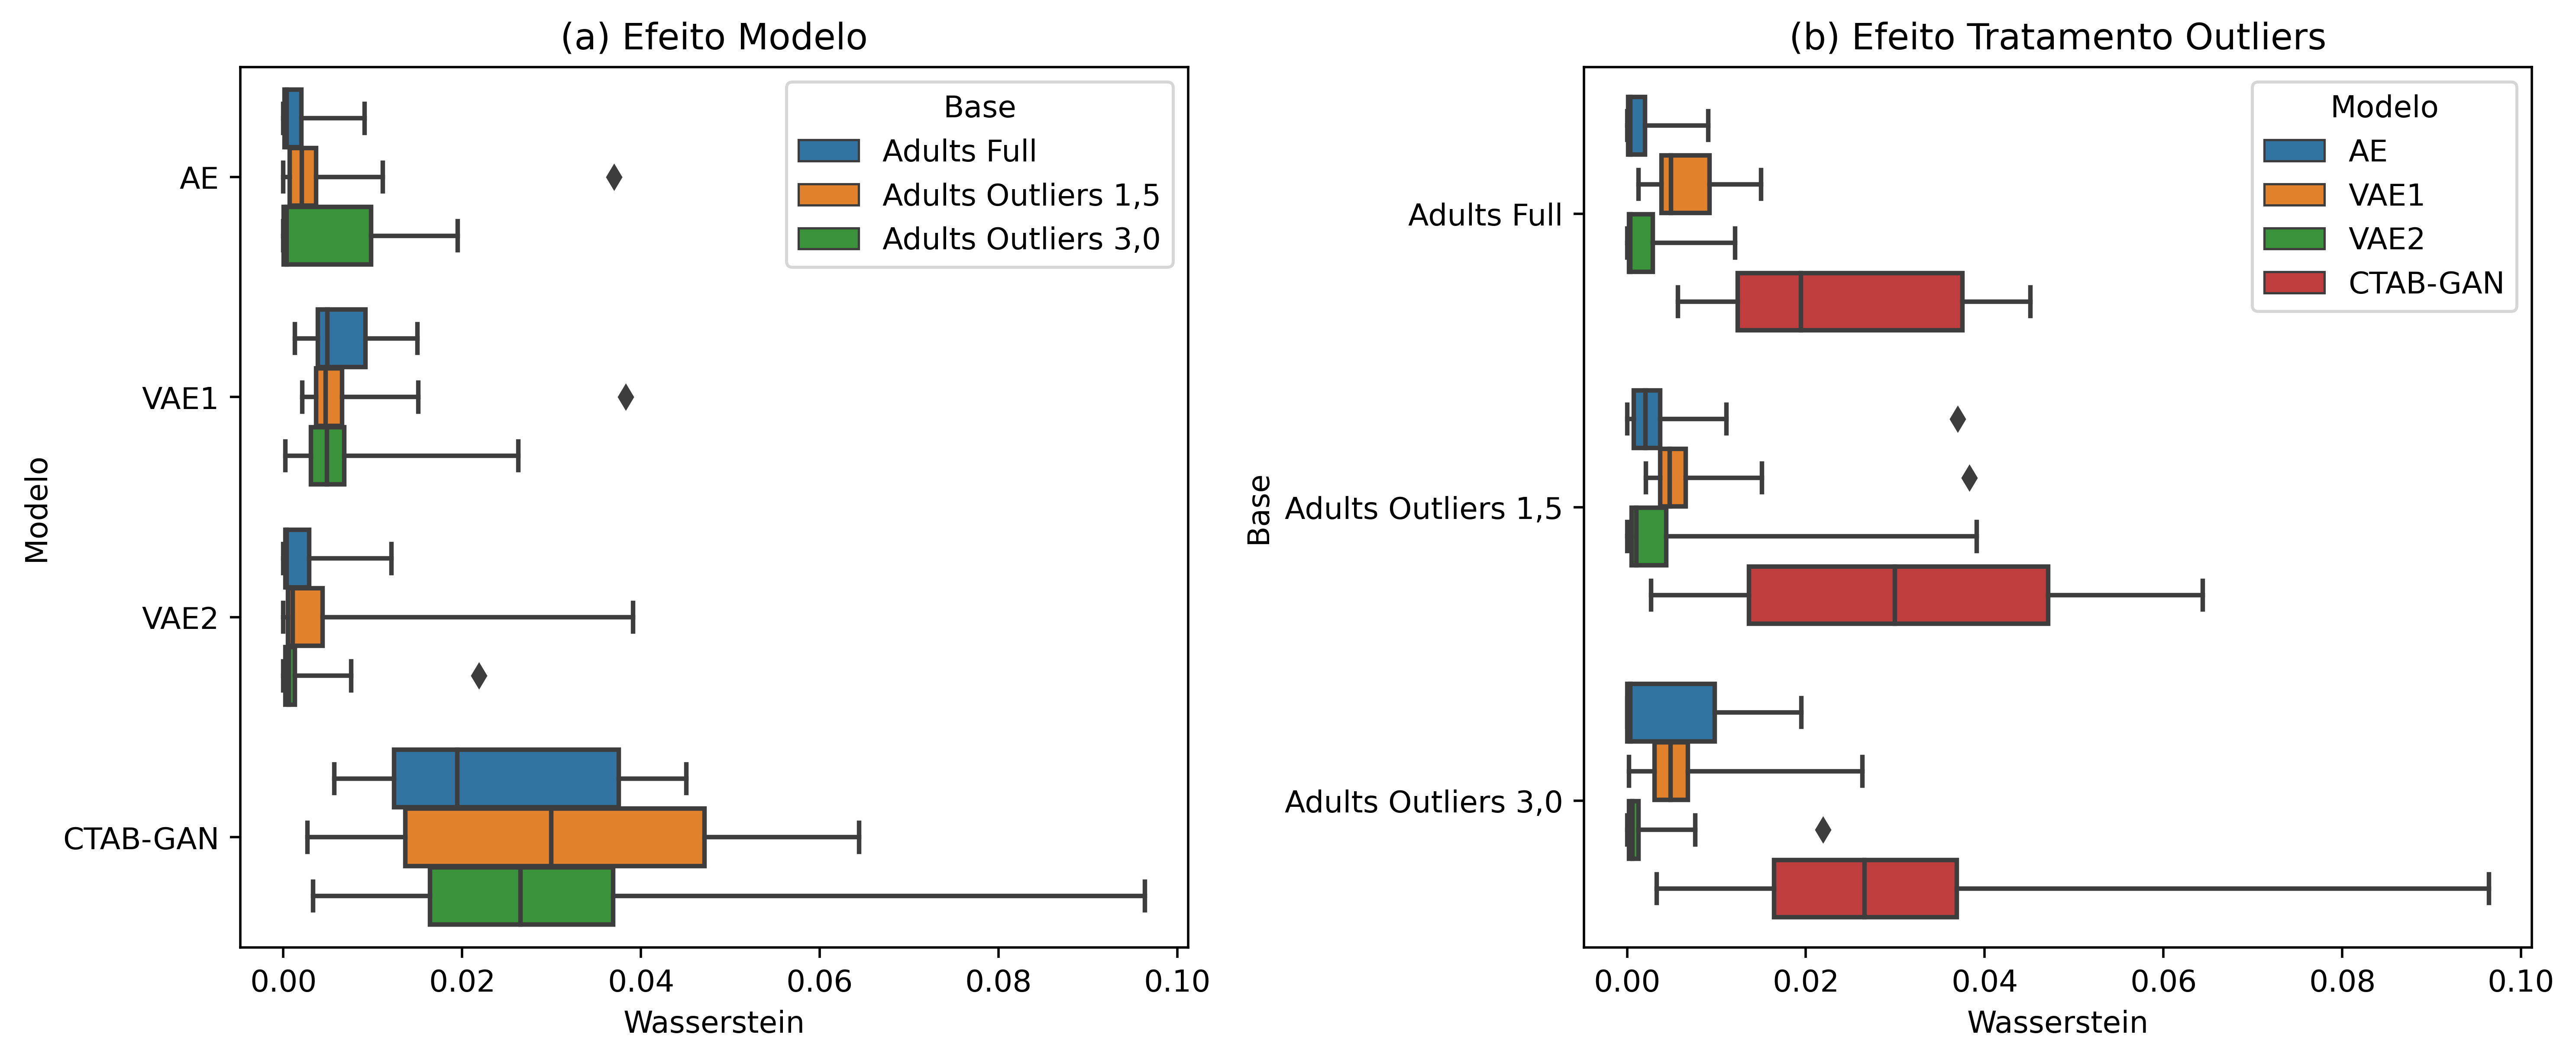

In [21]:
fig, ax = plt.subplots(1,2, figsize = (12,5), dpi = 500)
sns.boxplot(x = 'Wasserstein', y = 'Modelo',data = df, hue = 'Base',orient = 'h', ax = ax[0], whis = 10)
ax[0].set_title("(a) Efeito Modelo")
#ax[0].legend(loc = [1.05,0.7])

sns.boxplot(x = 'Wasserstein', y = 'Base',data = df, hue = 'Modelo',orient = 'h', ax = ax[1], whis = 10)
#ax[1].legend(loc = [1.05,0.7])
ax[1].set_title("(b) Efeito Tratamento Outliers")

fig.tight_layout()

In [27]:
df = pd.read_csv("Bases/fidelidade.csv")

In [28]:
df.head()

,Tipo,Métrica,Adults,"Adults Outliers 1,5","Adults Outliers 3,0"
0,AE,Wasserstein (Min),"0,00000","0,00000","0,00000"
1,AE,Wasserstein (Mediana),"0,00034","0,00171","0,00083"
2,AE,Wasserstein (Max),"0,00821","0,03853","0,02034"
3,AE,Wasserstein (média),"0,00185","0,00465","0,00297"
4,VAE 1,Wasserstein (Min),"0,00000","0,00000","0,00000"


In [29]:
df['Tipo'] = df['Tipo'].replace({"VAE 1":"VAE_7HL","VAE 2":"VAE_5HL"})
df.columns = ['Tipo', 'Métrica', "Tratamento A", "Tratamento C", "Tratamento B"]
df = df[['Tipo', 'Métrica', "Tratamento A", "Tratamento B", "Tratamento C"]]

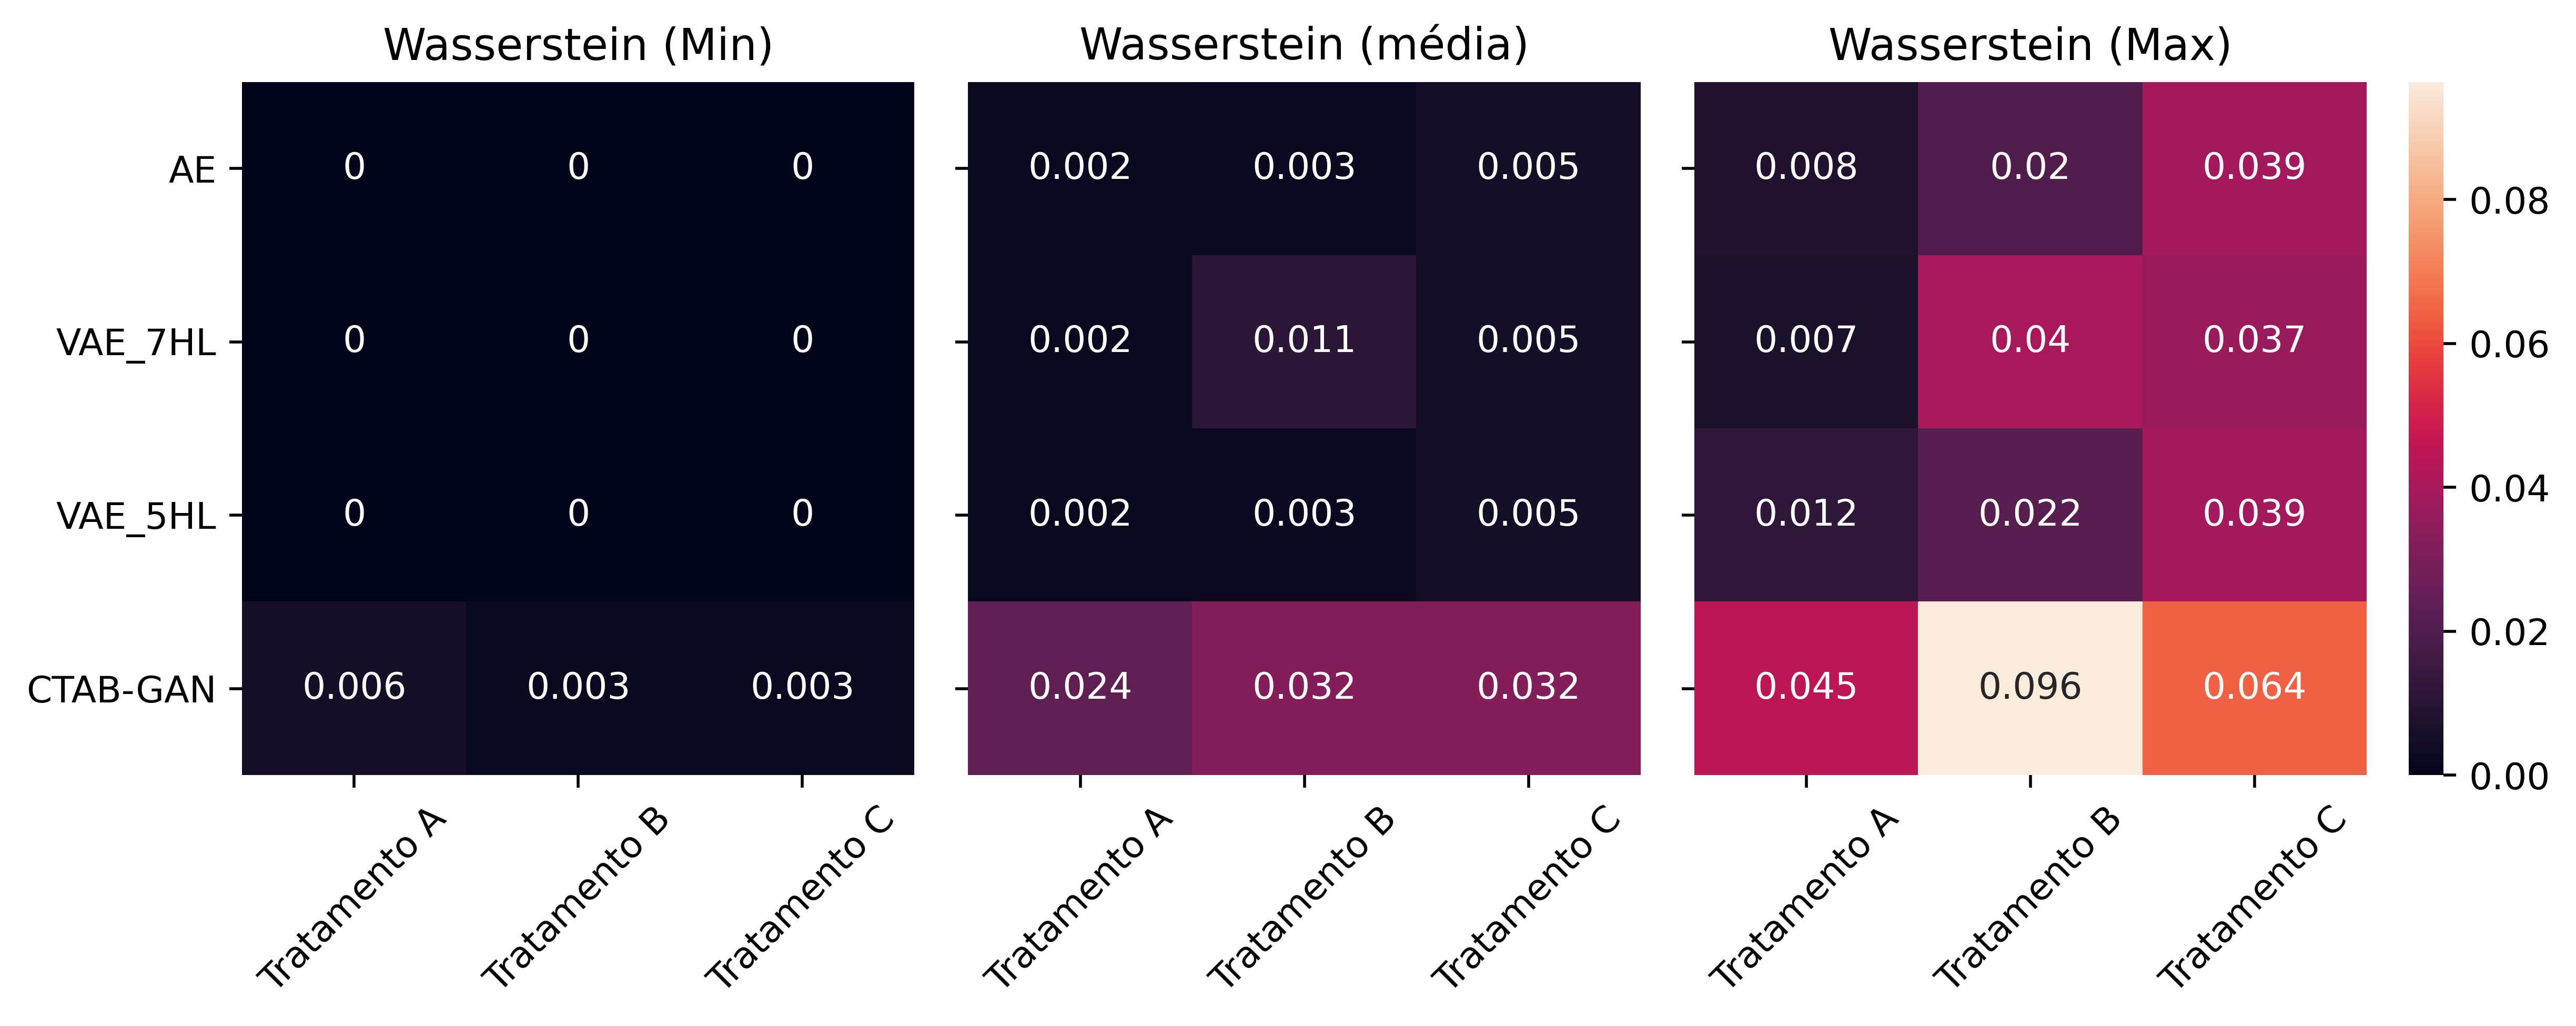

In [36]:
cols = ["Tratamento A", "Tratamento B", "Tratamento C"]
models = ["AE","VAE_7HL","VAE_5HL","CTAB-GAN"]

df = df.applymap(lambda x: str(x).replace(',','.'))

fig, ax = plt.subplots(1,3, figsize = (10,4), dpi = 500, sharey = True, gridspec_kw={'width_ratios': [0.8,0.8, 1]})
i = 0
for m in ['Wasserstein (Min)', 'Wasserstein (média)','Wasserstein (Max)']:
    df_temp = df.loc[df['Métrica'] == m].drop('Métrica', axis = 1).copy()
    df_temp.index = df_temp.Tipo.copy()
    df_temp.drop('Tipo', axis = 1, inplace = True)
    if i == 2:
        sns.heatmap(df_temp.astype('float').round(3), annot = True, ax = ax[i], vmin = df[cols].min().min(), vmax = df[cols].max().max(), cbar = True)
    else:
        sns.heatmap(df_temp.astype('float').round(3), annot = True, ax = ax[i], vmin = df[cols].min().min(), vmax = df[cols].max().max(), cbar = False)
    ax[i].set_title(m)
    ax[i].set_ylabel("")
    ax[i].set_xticklabels(cols, rotation = 45)
    ax[i].set_yticklabels(models, rotation = 0)
    
    i+=1
fig.tight_layout()
fig.savefig("analise_fidelidade_500dpi.png")


# Utilidade


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Bases/analise_utilidade.csv")
df

,Tipo,Métrica,Adults,"Adults Outliers 1,5","Adults Outliers 3,0"
0,AE,Acurácia,"0,06216","0,04144","0,04298"
1,AE,AUROC,"0,06219","0,06270","0,00368"
2,VAE 1,Acurácia,"0,06216","0,05142","0,06523"
3,VAE 1,AUROC,"0,05379","0,05934","0,08588"
4,VAE 2,Acurácia,"0,03684","0,03377","0,02993"
5,VAE 2,AUROC,"0,09707","0,01450","0,03951"
6,CTAB-GAN,Acurácia,"0,03000","0,05000","0,04000"
7,CTAB-GAN,AUROC,"0,05000","0,07000","0,03000"


In [22]:
df['Tipo'] = df['Tipo'].replace({"VAE 1":"VAE_7HL","VAE 2":"VAE_5HL"})
df.columns = ['Tipo', 'Métrica', "Tratamento A", "Tratamento C", "Tratamento B"]
df = df[['Tipo', 'Métrica', "Tratamento A", "Tratamento B", "Tratamento C"]]

In [25]:
dir(fig)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_axes_internal',
 '_agg_filter',
 '_align_xlabel_grp',
 '_align_ylabel_grp',
 '_alpha',
 '_animated',
 '_axobservers',
 '_axstack',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_constrained',
 '_constrained_layout_pads',
 '_contains',
 '_default_contains',
 '_dpi',
 '_gci',
 '_get_clipping_extent_bbox',
 '_get_dpi',
 '_gid',
 '_gridspecs',
 '_in_layout',
 '_label',
 '_layoutbox',
 '_make_key',
 '_mouseover',
 '_normalize_grid_string',
 '_oid',
 '_path_effects',
 '_picker',
 '_process_projection_requirements',
 '_propobservers',
 '_rasterized',
 '_remove_method',
 '_repr_html_',
 '

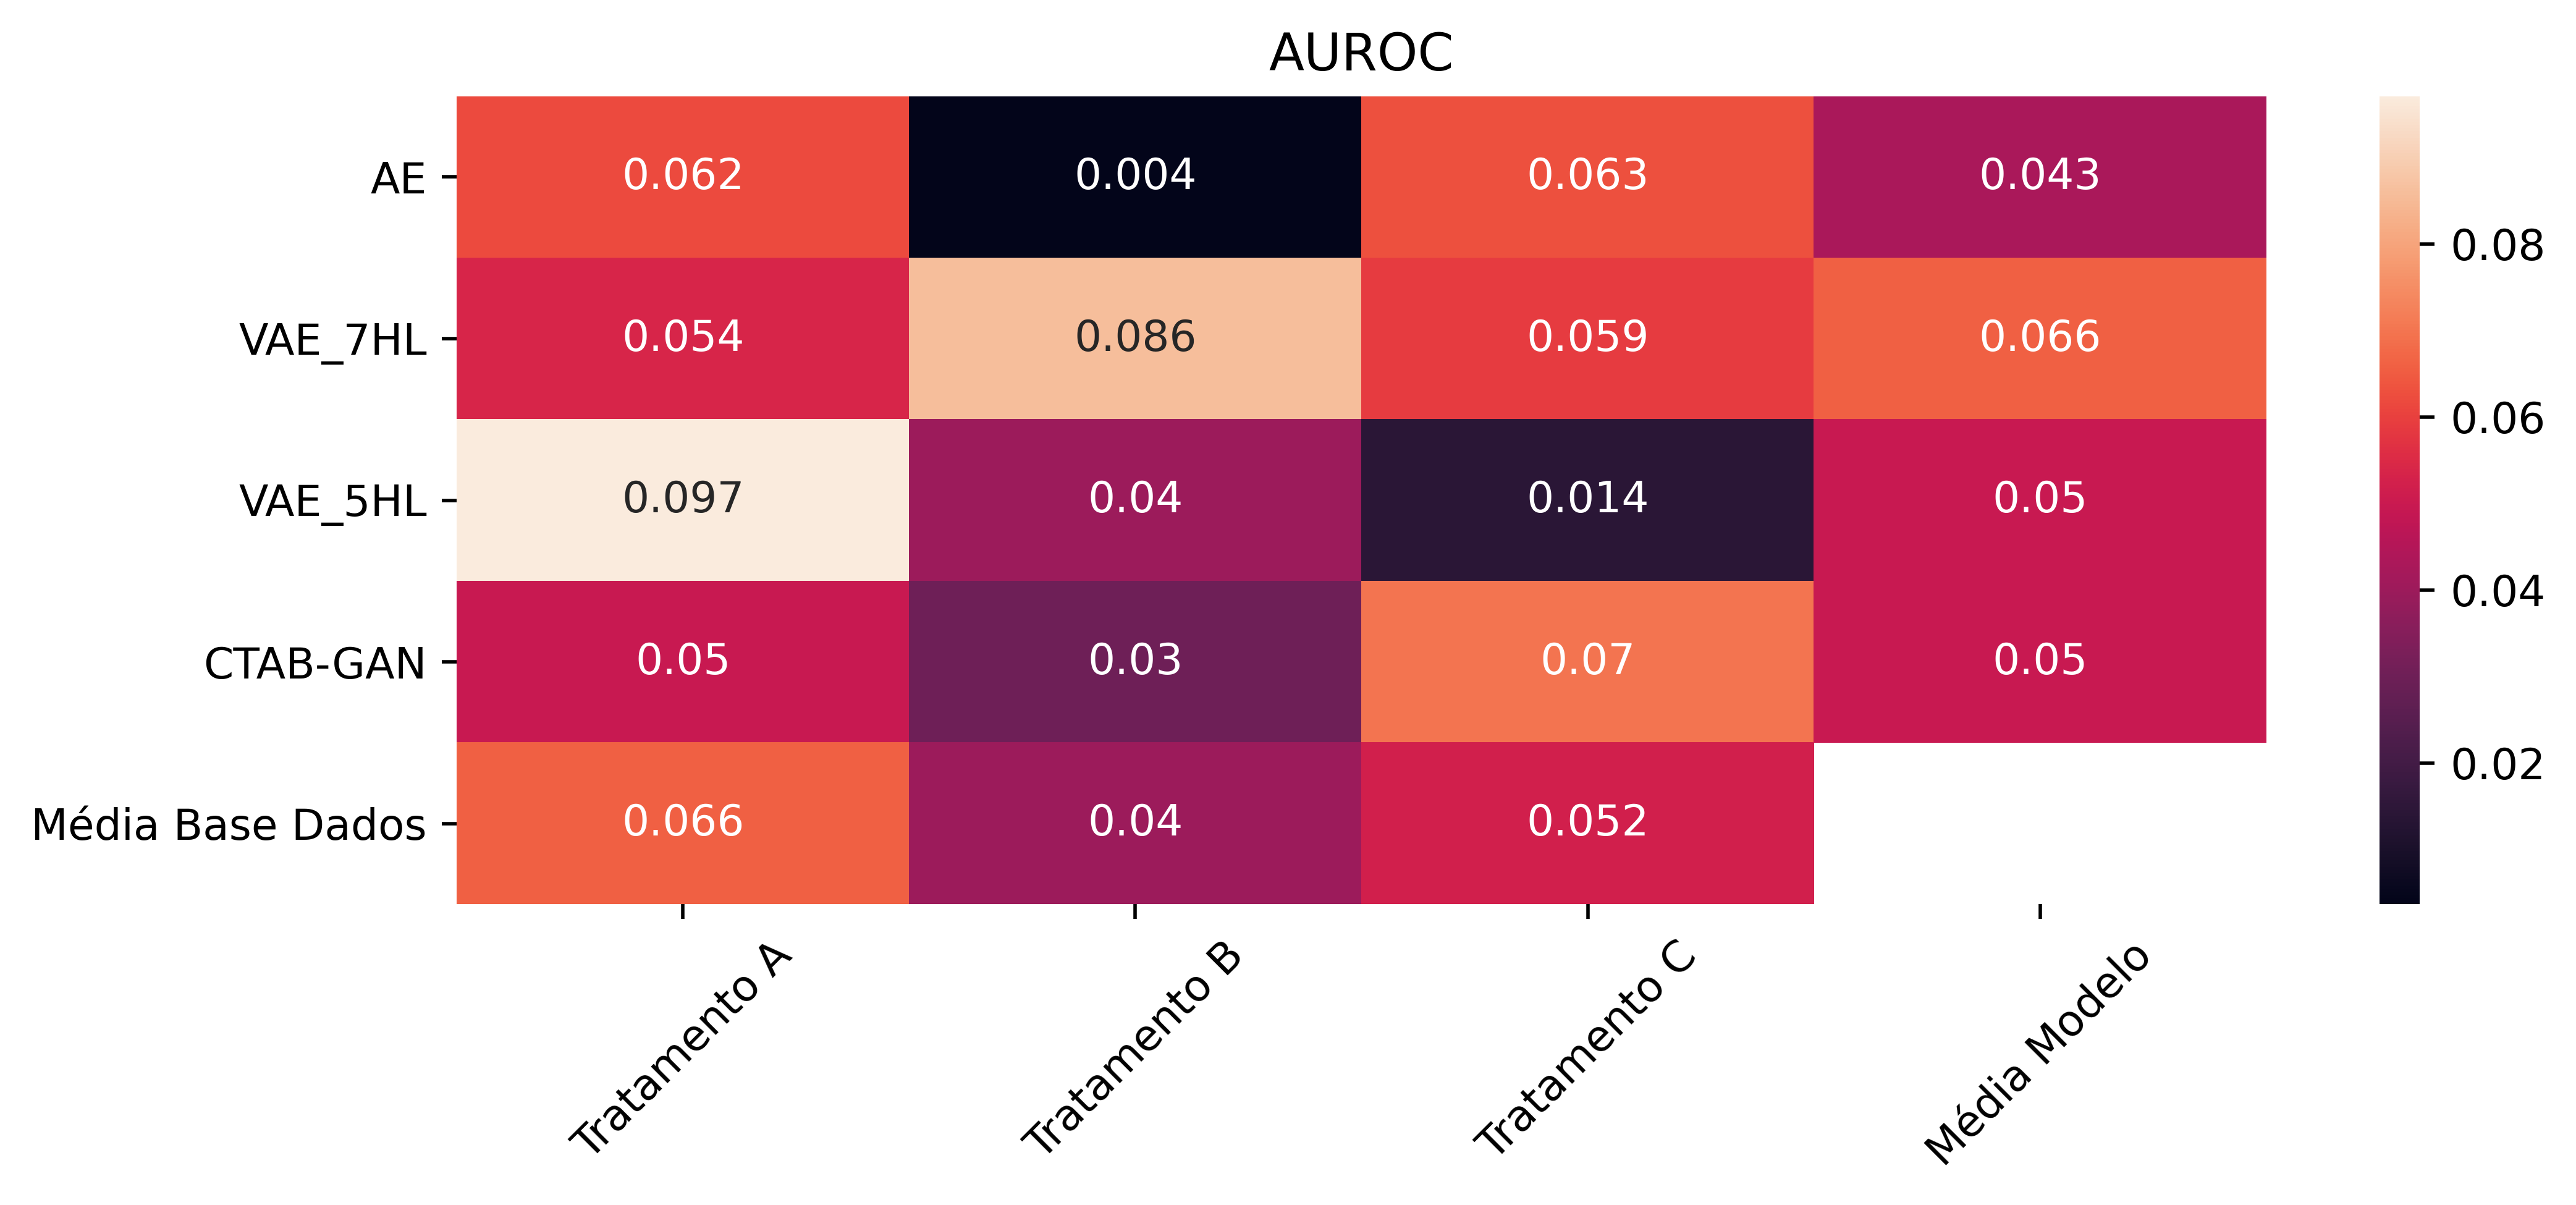

In [26]:
cols = ["Tratamento A", "Tratamento B", "Tratamento C","Média Modelo"]
cols2 = ["Tratamento A", "Tratamento B", "Tratamento C"]



df = df.applymap(lambda x: str(x).replace(',','.'))

metricas = ['AUROC']

fig, ax = plt.subplots(1,len(metricas), figsize = (9,4), dpi = 500, sharey = True, gridspec_kw={'width_ratios': [0.8]*(len(metricas) - 1) + [1]})
i = 0
for m in metricas:
    df_temp = df.loc[df['Métrica'] == m].drop('Métrica', axis = 1).copy()
    df_temp.index = df_temp.Tipo.copy()
    df_temp.drop('Tipo', axis = 1, inplace = True)
    df_temp = df_temp.astype(float)
    df_temp['Média Modelo'] = df_temp.mean(axis = 1)
    df_temp.loc['Média Base Dados', :] = df_temp.mean(axis = 0)
    df_temp.loc['Média Base Dados', 'Média Modelo'] = None
    
    if len(metricas) > 1:
        if i == len(metricas) - 1:
            sns.heatmap(df_temp.astype('float').round(3), annot = True, ax = ax[i], vmin = df[cols2].min().min(), vmax = df[cols2].max().max(), cbar = True)
        else:
            sns.heatmap(df_temp.astype('float').round(3), annot = True, ax = ax[i], vmin = df[cols2].min().min(), vmax = df[cols2].max().max(), cbar = False)
        ax[i].set_title(m)
        ax[i].set_ylabel("")
        ax[i].set_xticklabels(cols, rotation = 45)
    else:
        sns.heatmap(df_temp.astype('float').round(3), annot = True, ax = ax, vmin = df[cols2].min().min(), vmax = df[cols2].max().max(), cbar = True)
        ax.set_title(m)
        ax.set_ylabel("")
        ax.set_xticklabels(cols, rotation = 45)
    
    i+=1
fig.tight_layout()
fig.savefig("analise_utilidade_500dpi.png")

# Privacidade

In [29]:
df = pd.read_csv("Bases/analise_privacidades.csv")

In [30]:
df_ae = pd.read_csv("Bases/base_distancia_AE.csv")
df_vae1 = pd.read_csv("Bases/base_distancia_VAE1.csv")
df_vae2 = pd.read_csv("Bases/base_distancia_VAE2.csv")
df_gan1 = pd.read_csv("Bases/base_distancia_CTABGAN_AF.csv")
df_gan2 = pd.read_csv("Bases/base_distancia_CTABGAN_AF15.csv")
df_gan3 = pd.read_csv("Bases/base_distancia_CTABGAN_AF30.csv")

In [31]:
df_ae['Tipo'] = 'AE'
df_vae1['Tipo'] = 'VAE_HL7'
df_vae2['Tipo'] = 'VAE_HL5'
df_gan1['Tipo'] = 'CTAB-GAN'
df_gan2['Tipo'] = 'CTAB-GAN'
df_gan3['Tipo'] = 'CTAB-GAN'

df_ae['variable'] = df_ae['base'].str.replace(" Full",'').copy()
df_vae1['variable'] = df_vae1['base'].str.replace(" Full",'').copy()
df_vae2['variable'] = df_vae2['base'].str.replace(" Full",'').copy()
df_gan1['variable'] = df_gan1['base'].str.replace(" Full",'').copy()
df_gan2['variable'] = df_gan2['base'].str.replace(" Full",'').copy()
df_gan3['variable'] = df_gan3['base'].str.replace(" Full",'').copy()
df_gan3['variable'] = df_gan3['variable'].str.replace("1.5",'3.0').copy()

In [32]:
df_ae['variable'] = df_ae['variable'].str.replace("Adults Outliers 3.0",'B').replace("Adults Outliers 1.5",'C').replace("Adults",'A')
df_vae1['variable'] = df_vae1['variable'].str.replace("Adults Outliers 3.0",'B').replace("Adults Outliers 1.5",'C').replace("Adults",'A')
df_vae2['variable'] = df_vae2['variable'].str.replace("Adults Outliers 3.0",'B').replace("Adults Outliers 1.5",'C').replace("Adults",'A')
df_gan1['variable'] = df_gan1['variable'].str.replace("Adults Outliers 3.0",'B').replace("Adults Outliers 1.5",'C').replace("Adults",'A')
df_gan2['variable'] = df_gan2['variable'].str.replace("Adults Outliers 3.0",'B').replace("Adults Outliers 1.5",'C').replace("Adults",'A')
df_gan3['variable'] = df_gan3['variable'].str.replace("Adults Outliers 3.0",'B').replace("Adults Outliers 1.5",'C').replace("Adults",'A')

In [33]:
df_ae['NNDR'] = df_ae['distancia_1']/df_ae['distancia_2']
df_vae1['NNDR'] = df_vae1['distancia_1']/df_vae1['distancia_2']
df_vae2['NNDR'] = df_vae2['distancia_1']/df_vae2['distancia_2']
df_gan1['NNDR'] = df_gan1['distancia_1']/df_gan1['distancia_2']
df_gan2['NNDR'] = df_gan2['distancia_1']/df_gan2['distancia_2']
df_gan3['NNDR'] = df_gan3['distancia_1']/df_gan3['distancia_2']

In [34]:
final = pd.DataFrame()
for d in [df_ae, df_vae1, df_vae2, df_gan1, df_gan2, df_gan3]:
    final = final.append(d[['Tipo','variable','NNDR']].sort_values(by = 'variable'))
#    final  = final.append(d[['Tipo','variable','distancia_1']].rename({"distancia_1":"value"}, axis = 1).copy())
#    final  = final.append(d[['Tipo','variable','distancia_2']].rename({"distancia_2":"value"}, axis = 1).copy())    

In [35]:
#final = final.sort_values(by = 'variable')
#final = final.sort_values(by = 'Tipo')
final.columns = ['Modelo','Tratamento', 'NNDR']

In [36]:
final.head()

,Modelo,Tratamento,NNDR
0,AE,A,0.160121
4250,AE,A,0.396849
4249,AE,A,0.273190
4248,AE,A,0.120755
4247,AE,A,0.163568


In [37]:
final.to_csv("privacidade_final.csv", index = False)

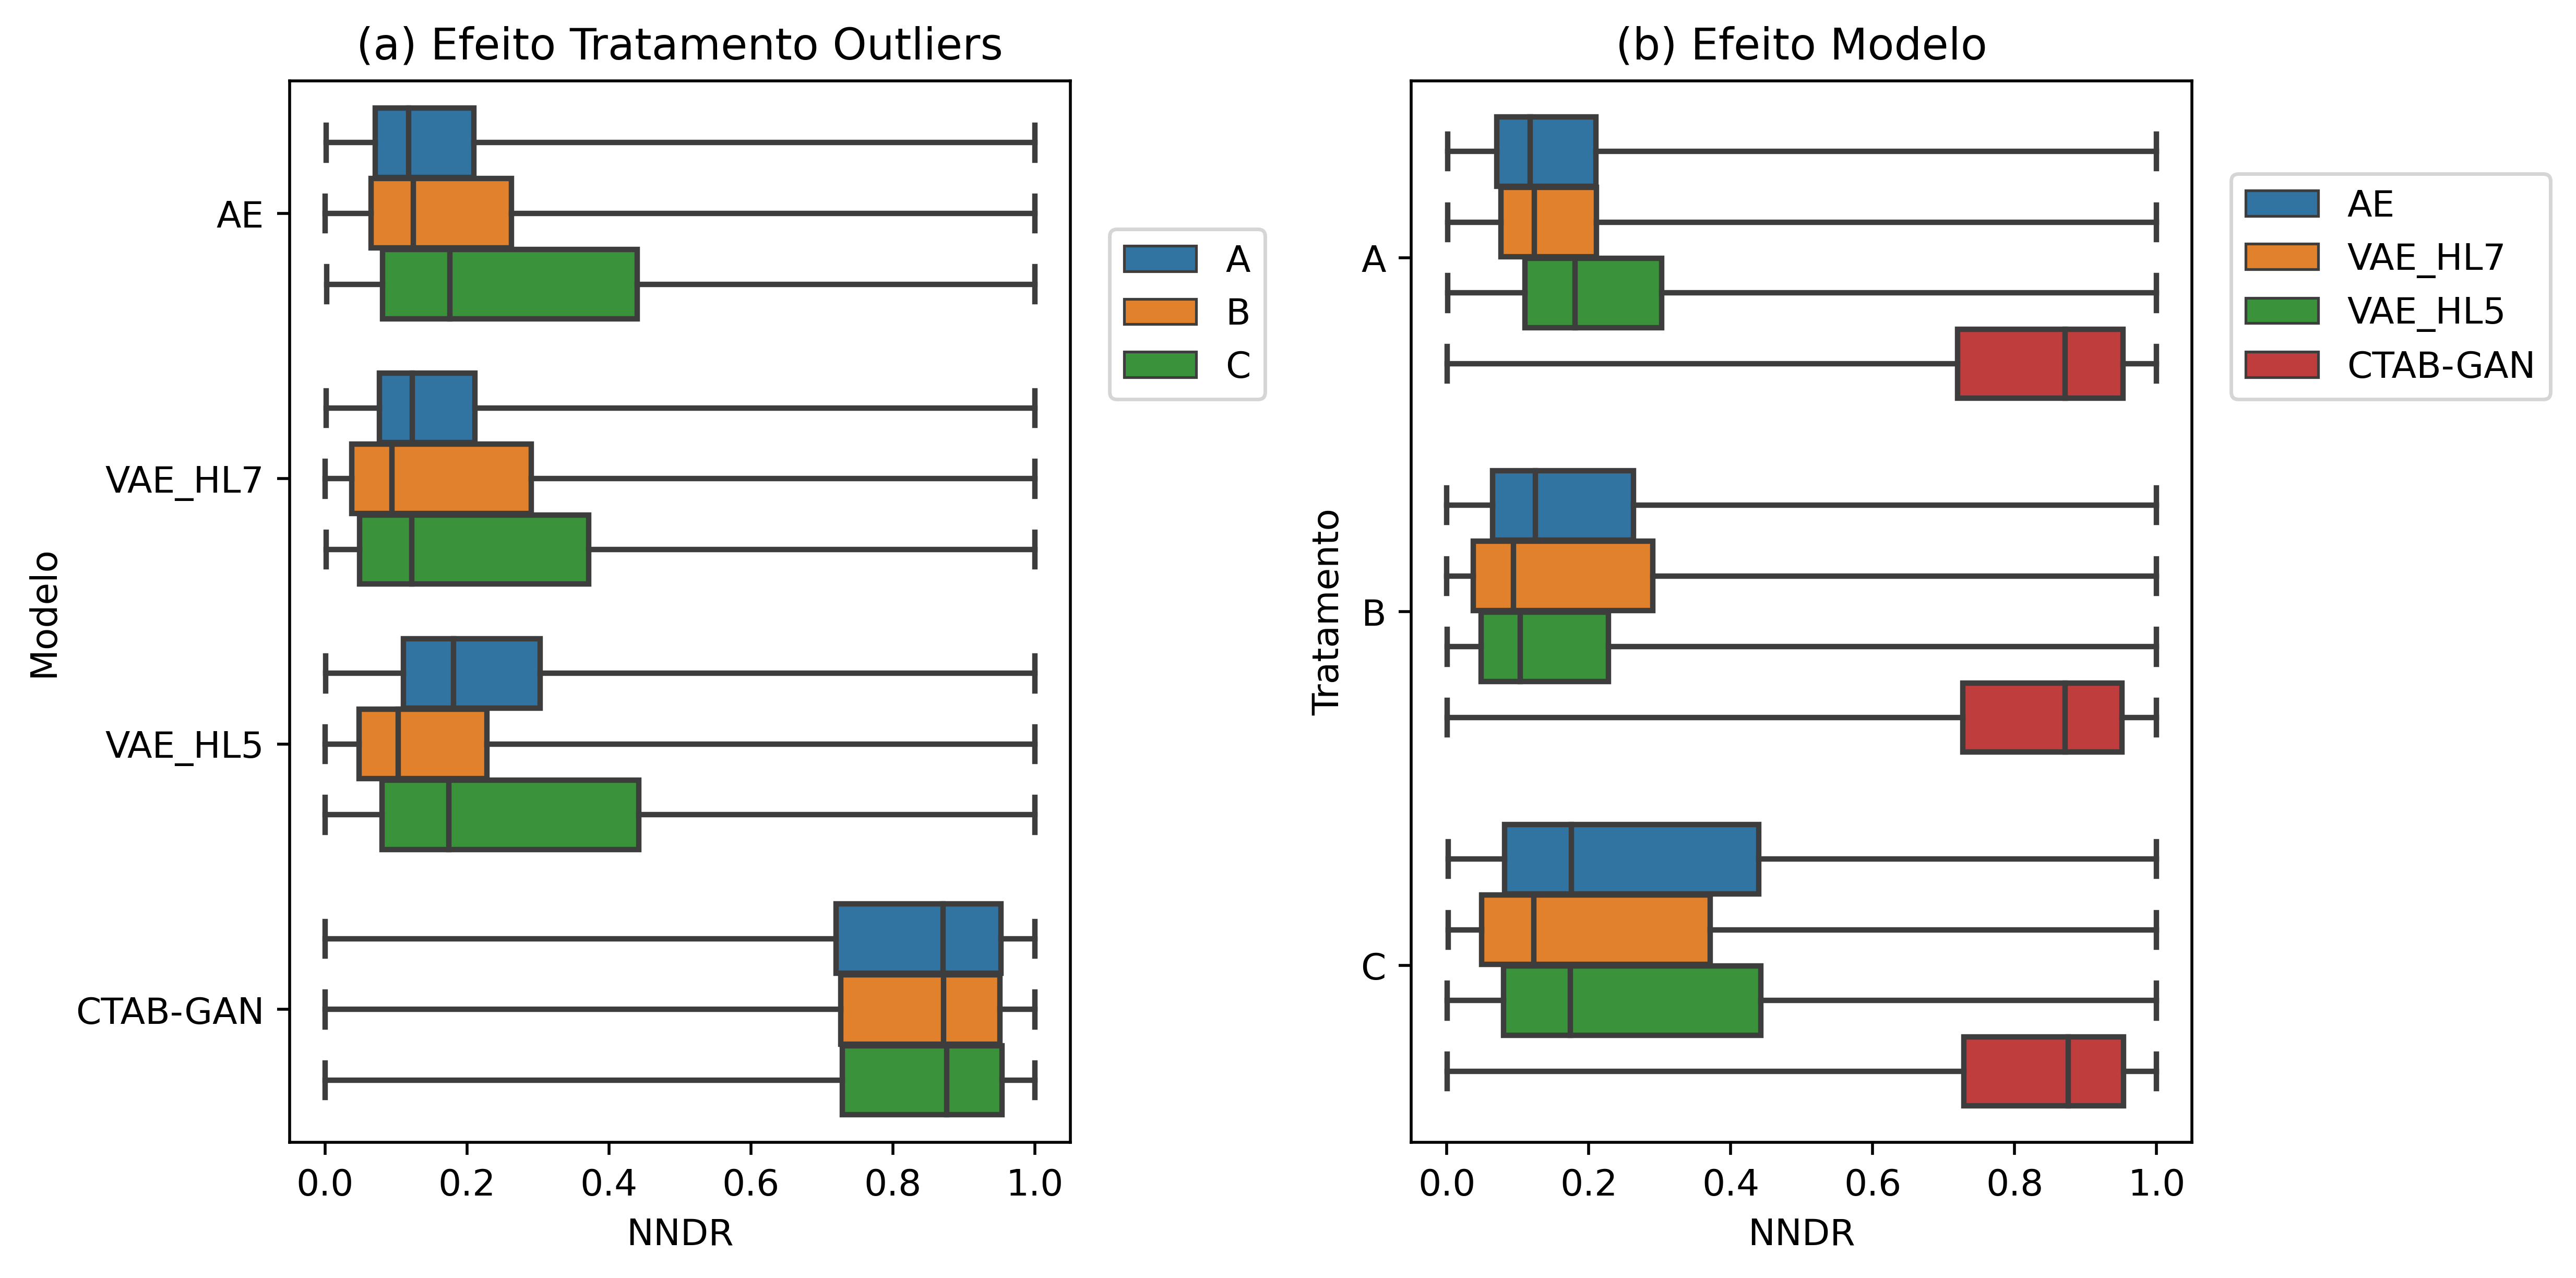

In [52]:
fig, ax = plt.subplots(1,2, figsize = (10,5), dpi = 500)
sns.boxplot(x = 'NNDR', y = 'Modelo',data = final, hue = 'Tratamento',orient = 'h', ax = ax[0], whis = 10)
#sns.boxplot(x = 'value', y = 'variable',data = final, hue = 'Tipo',orient = 'h', ax = ax[0], whis = 10)
ax[0].set_title("(a) Efeito Tratamento Outliers")
ax[0].legend(loc = [1.05,0.7])

sns.boxplot(x = 'NNDR', y = 'Tratamento',data = final, hue = 'Modelo',orient = 'h', ax = ax[1], whis = 10)
#sns.boxplot(x = 'value', y = 'Tipo',data = final, hue = 'variable',orient = 'h', ax = ax[1], whis = 10)
ax[1].legend(loc = [1.05,0.7])
ax[1].set_title("(b) Efeito Modelo")

fig.tight_layout()

In [45]:
fig.savefig('analise_privacidade_outliers_modelo_500dpi.png')

In [55]:
gb_df = final.loc[final.Modelo == 'AE'].groupby(['Tratamento'])['NNDR'].quantile([0,0.05,0.25,0.5,0.75,1])
gb_df.round(3).unstack().T

Tratamento,A,B,C
0.00,0.001,0.000,0.002
0.05,0.030,0.014,0.023
0.25,0.071,0.064,0.081
0.50,0.118,0.125,0.176
0.75,0.210,0.263,0.439
1.00,1.000,1.000,1.000


In [57]:
gb_df = final.loc[final.Modelo == 'VAE_HL7'].groupby(['Tratamento'])['NNDR'].quantile([0,0.05,0.25,0.5,0.75,1])
gb_df.round(3).unstack().T

Tratamento,A,B,C
0.00,0.001,0.000,0.002
0.05,0.035,0.006,0.013
0.25,0.076,0.037,0.049
0.50,0.123,0.094,0.123
0.75,0.211,0.290,0.371
1.00,1.000,1.000,1.000


In [58]:
gb_df = final.loc[final.Modelo == 'VAE_HL5'].groupby(['Tratamento'])['NNDR'].quantile([0,0.05,0.25,0.5,0.75,1])
gb_df.round(3).unstack().T

Tratamento,A,B,C
0.00,0.001,0.000,0.000
0.05,0.053,0.005,0.020
0.25,0.110,0.048,0.080
0.50,0.181,0.103,0.174
0.75,0.303,0.228,0.442
1.00,1.000,1.000,1.000


In [59]:
gb_df = final.loc[final.Modelo == 'CTAB-GAN'].groupby(['Tratamento'])['NNDR'].quantile([0,0.05,0.25,0.5,0.75,1])
gb_df.round(3).unstack().T

Tratamento,A,B,C
0.00,0.000,0.000,0.000
0.05,0.399,0.409,0.400
0.25,0.720,0.727,0.729
0.50,0.871,0.871,0.876
0.75,0.953,0.951,0.954
1.00,1.000,1.000,1.000


In [43]:
gb_df = final.groupby(['Modelo','Tratamento'])['NNDR'].quantile([0.05])
gb_df.reset_index(level =2, drop = True ).unstack().to_csv("Bases/analise_privacidade_2.csv")

In [44]:
df_util = pd.read_csv('Bases/analise_utilidade.csv')
df_fide = pd.read_csv('Bases/fidelidade.csv')
df_priv = pd.read_csv('Bases/analise_privacidade_2.csv')
df_tepo = pd.read_csv("Bases/tempo_exec.csv")

In [65]:
df_util2

,Tipo,Métrica,A,C,B
1,AE,AUROC,"0,06219","0,06270","0,00368"
3,VAE 1,AUROC,"0,05379","0,05934","0,08588"
5,VAE 2,AUROC,"0,09707","0,01450","0,03951"
7,CTAB-GAN,AUROC,"0,05000","0,07000","0,03000"


In [66]:
df_util2 = df_util.loc[df_util['Métrica'] == 'AUROC']
df_util2.rename({"Tipo":"Modelo","Adults":"A", "Adults Outliers 1,5":"C", "Adults Outliers 3,0":"B"},axis = 1,inplace = True)
df_util2 = df_util2[["Modelo","Métrica","A","B","C"]]
df_util2['Modelo'] = df_util2['Modelo'].replace({"VAE 1":"VAE_HL7", "VAE 2":"VAE_HL5"},)
df_util2 = df_util2.reset_index(drop=True)
df_util2

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Modelo,Métrica,A,B,C
0,AE,AUROC,"0,06219","0,00368","0,06270"
1,VAE_HL7,AUROC,"0,05379","0,08588","0,05934"
2,VAE_HL5,AUROC,"0,09707","0,03951","0,01450"
3,CTAB-GAN,AUROC,"0,05000","0,03000","0,07000"


In [67]:
df_fide2 = df_fide.loc[df_fide['Métrica'] == 'Wasserstein (Mediana)']
df_fide2.rename({"Tipo":"Modelo","Adults":"A", "Adults Outliers 1,5":"C", "Adults Outliers 3,0":"B"},axis = 1,inplace = True)
df_fide2 = df_fide2[["Modelo","Métrica","A","B","C"]]
df_fide2['Modelo'] = df_fide2['Modelo'].replace({"VAE 1":"VAE_HL7", "VAE 2":"VAE_HL5"},)
df_fide2 = df_fide2.reset_index(drop=True)
df_fide2

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Modelo,Métrica,A,B,C
0,AE,Wasserstein (Mediana),"0,00034","0,00083","0,00171"
1,VAE_HL7,Wasserstein (Mediana),"0,00056","0,00910","0,00211"
2,VAE_HL5,Wasserstein (Mediana),"0,00036","0,00059","0,00107"
3,CTAB-GAN,Wasserstein (Mediana),"0,01941","0,02655","0,02992"


In [70]:
df_priv2 = df_priv
df_priv2 = df_priv2.iloc[[0,2,3,1]].reset_index(drop=True)
df_priv2['Métrica'] = 'NNDR(0.5)'
df_priv2 = df_priv2[['Modelo', "Métrica","A","B","C"]] 

In [68]:
df_tepo2 = df_tepo.replace("Variational Autoencoder 1","VAE_HL7").replace("Variational Autoencoder 2","VAE_HL5").replace("Autoencoder","AE").copy()
df_tepo2.rename({"Tipo":"Modelo","Adults":"A", "Adults Outliers 1,5":"C", "Adults Outliers 3,0":"B"},axis = 1,inplace = True)
df_tepo2 = df_tepo2[["Modelo","A","B","C"]]
df_tepo2

,Modelo,A,B,C
0,AE,196,179,148
1,VAE_HL7,670,563,435
2,VAE_HL5,603,507,416
3,CTAB-GAN,896,815,663


In [72]:
df_tepo3 = df_tepo2.melt("Modelo").rename({"value":"tempo"}, axis = 1)
df_priv3 = df_priv2.drop("Métrica", axis =1 ).melt("Modelo").rename({"value":"privacidade"}, axis = 1)
df_fide3 = df_fide2.drop("Métrica", axis =1 ).melt("Modelo").rename({"value":"fidelidade"}, axis = 1)
df_util3 = df_util2.drop("Métrica", axis =1 ).melt("Modelo").rename({"value":"utilidade"}, axis = 1)

In [73]:
df_final = df_tepo3.merge(df_priv3, on = ['Modelo', 'variable'], how = 'left')\
.merge(df_fide3, on = ['Modelo', 'variable'], how = 'left')\
.merge(df_util3, on = ['Modelo', 'variable'], how = 'left')

df_final

,Modelo,variable,tempo,privacidade,fidelidade,utilidade
0,AE,A,196,0.029872,"0,00034","0,06219"
1,VAE_HL7,A,670,0.034715,"0,00056","0,05379"
2,VAE_HL5,A,603,0.052835,"0,00036","0,09707"
3,CTAB-GAN,A,896,0.398874,"0,01941","0,05000"
4,AE,B,179,0.013719,"0,00083","0,00368"
5,VAE_HL7,B,563,0.006229,"0,00910","0,08588"
6,VAE_HL5,B,507,0.005422,"0,00059","0,03951"
7,CTAB-GAN,B,815,0.409430,"0,02655","0,03000"
8,AE,C,148,0.023318,"0,00171","0,06270"
9,VAE_HL7,C,435,0.013193,"0,00211","0,05934"


In [75]:
num_vars = ['fidelidade','utilidade']
df_final[num_vars] = df_final[num_vars].applymap(lambda x: x.replace(",",".")).astype('float')
df_final

,Modelo,variable,tempo,privacidade,fidelidade,utilidade
0,AE,A,196,0.029872,0.00034,0.06219
1,VAE_HL7,A,670,0.034715,0.00056,0.05379
2,VAE_HL5,A,603,0.052835,0.00036,0.09707
3,CTAB-GAN,A,896,0.398874,0.01941,0.05000
4,AE,B,179,0.013719,0.00083,0.00368
5,VAE_HL7,B,563,0.006229,0.00910,0.08588
6,VAE_HL5,B,507,0.005422,0.00059,0.03951
7,CTAB-GAN,B,815,0.409430,0.02655,0.03000
8,AE,C,148,0.023318,0.00171,0.06270
9,VAE_HL7,C,435,0.013193,0.00211,0.05934


In [76]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler(feature_range = [-1,1])
df_final[['tempo_adj','privacidade_adj','fidelidade_adj','utilidade_adj']] = mms.fit_transform(df_final[['tempo','privacidade','fidelidade','utilidade']])
df_final['tempo_adj'] = df_final['tempo_adj']*(-1)
df_final['fidelidade_adj'] = df_final['fidelidade_adj']*(-1)
df_final['utilidade_adj'] = df_final['utilidade_adj']*(-1)

In [80]:
df_final.rename({'variable':"Tratamento"}, axis = 1, inplace = True)

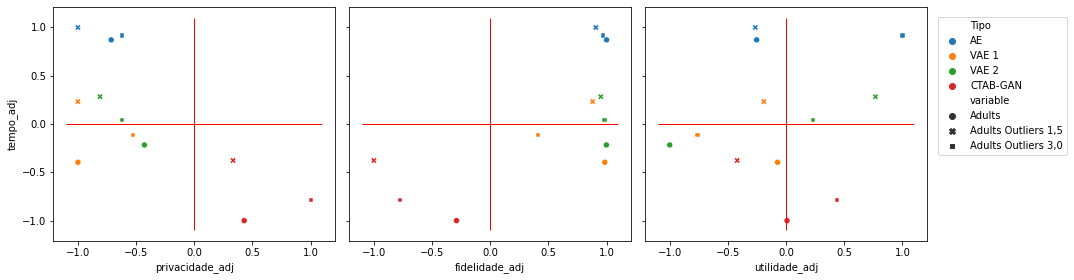

In [176]:
fig, ax = plt.subplots(1,3, figsize = (15,4), sharey = True)

sns.scatterplot(x = "privacidade_adj", y = 'tempo_adj', hue = 'Tipo', style = "variable",  ax = ax[0], data = df_final, legend = False)
ax[0].hlines(y=0, xmin=-1.1, xmax=1.1, linewidth=1, color='r')
ax[0].vlines(x=0, ymin=-1.1, ymax=1.1, linewidth=1, color='r')

sns.scatterplot(x = "fidelidade_adj", y = 'tempo_adj', hue = 'Tipo', style = "variable",  ax = ax[1], data = df_final, legend = False)
ax[1].hlines(y=0, xmin=-1.1, xmax=1.1, linewidth=1, color='r')
ax[1].vlines(x=0, ymin=-1.1, ymax=1.1, linewidth=1, color='r')

sns.scatterplot(x = "utilidade_adj", y = 'tempo_adj', hue = 'Tipo', style = "variable",  ax = ax[2], data = df_final, legend = True)
ax[2].legend(loc = [1.04,0.369])
ax[2].hlines(y=0, xmin=-1.1, xmax=1.1, linewidth=1, color='r')
ax[2].vlines(x=0, ymin=-1.1, ymax=1.1, linewidth=1, color='r')
fig.tight_layout()

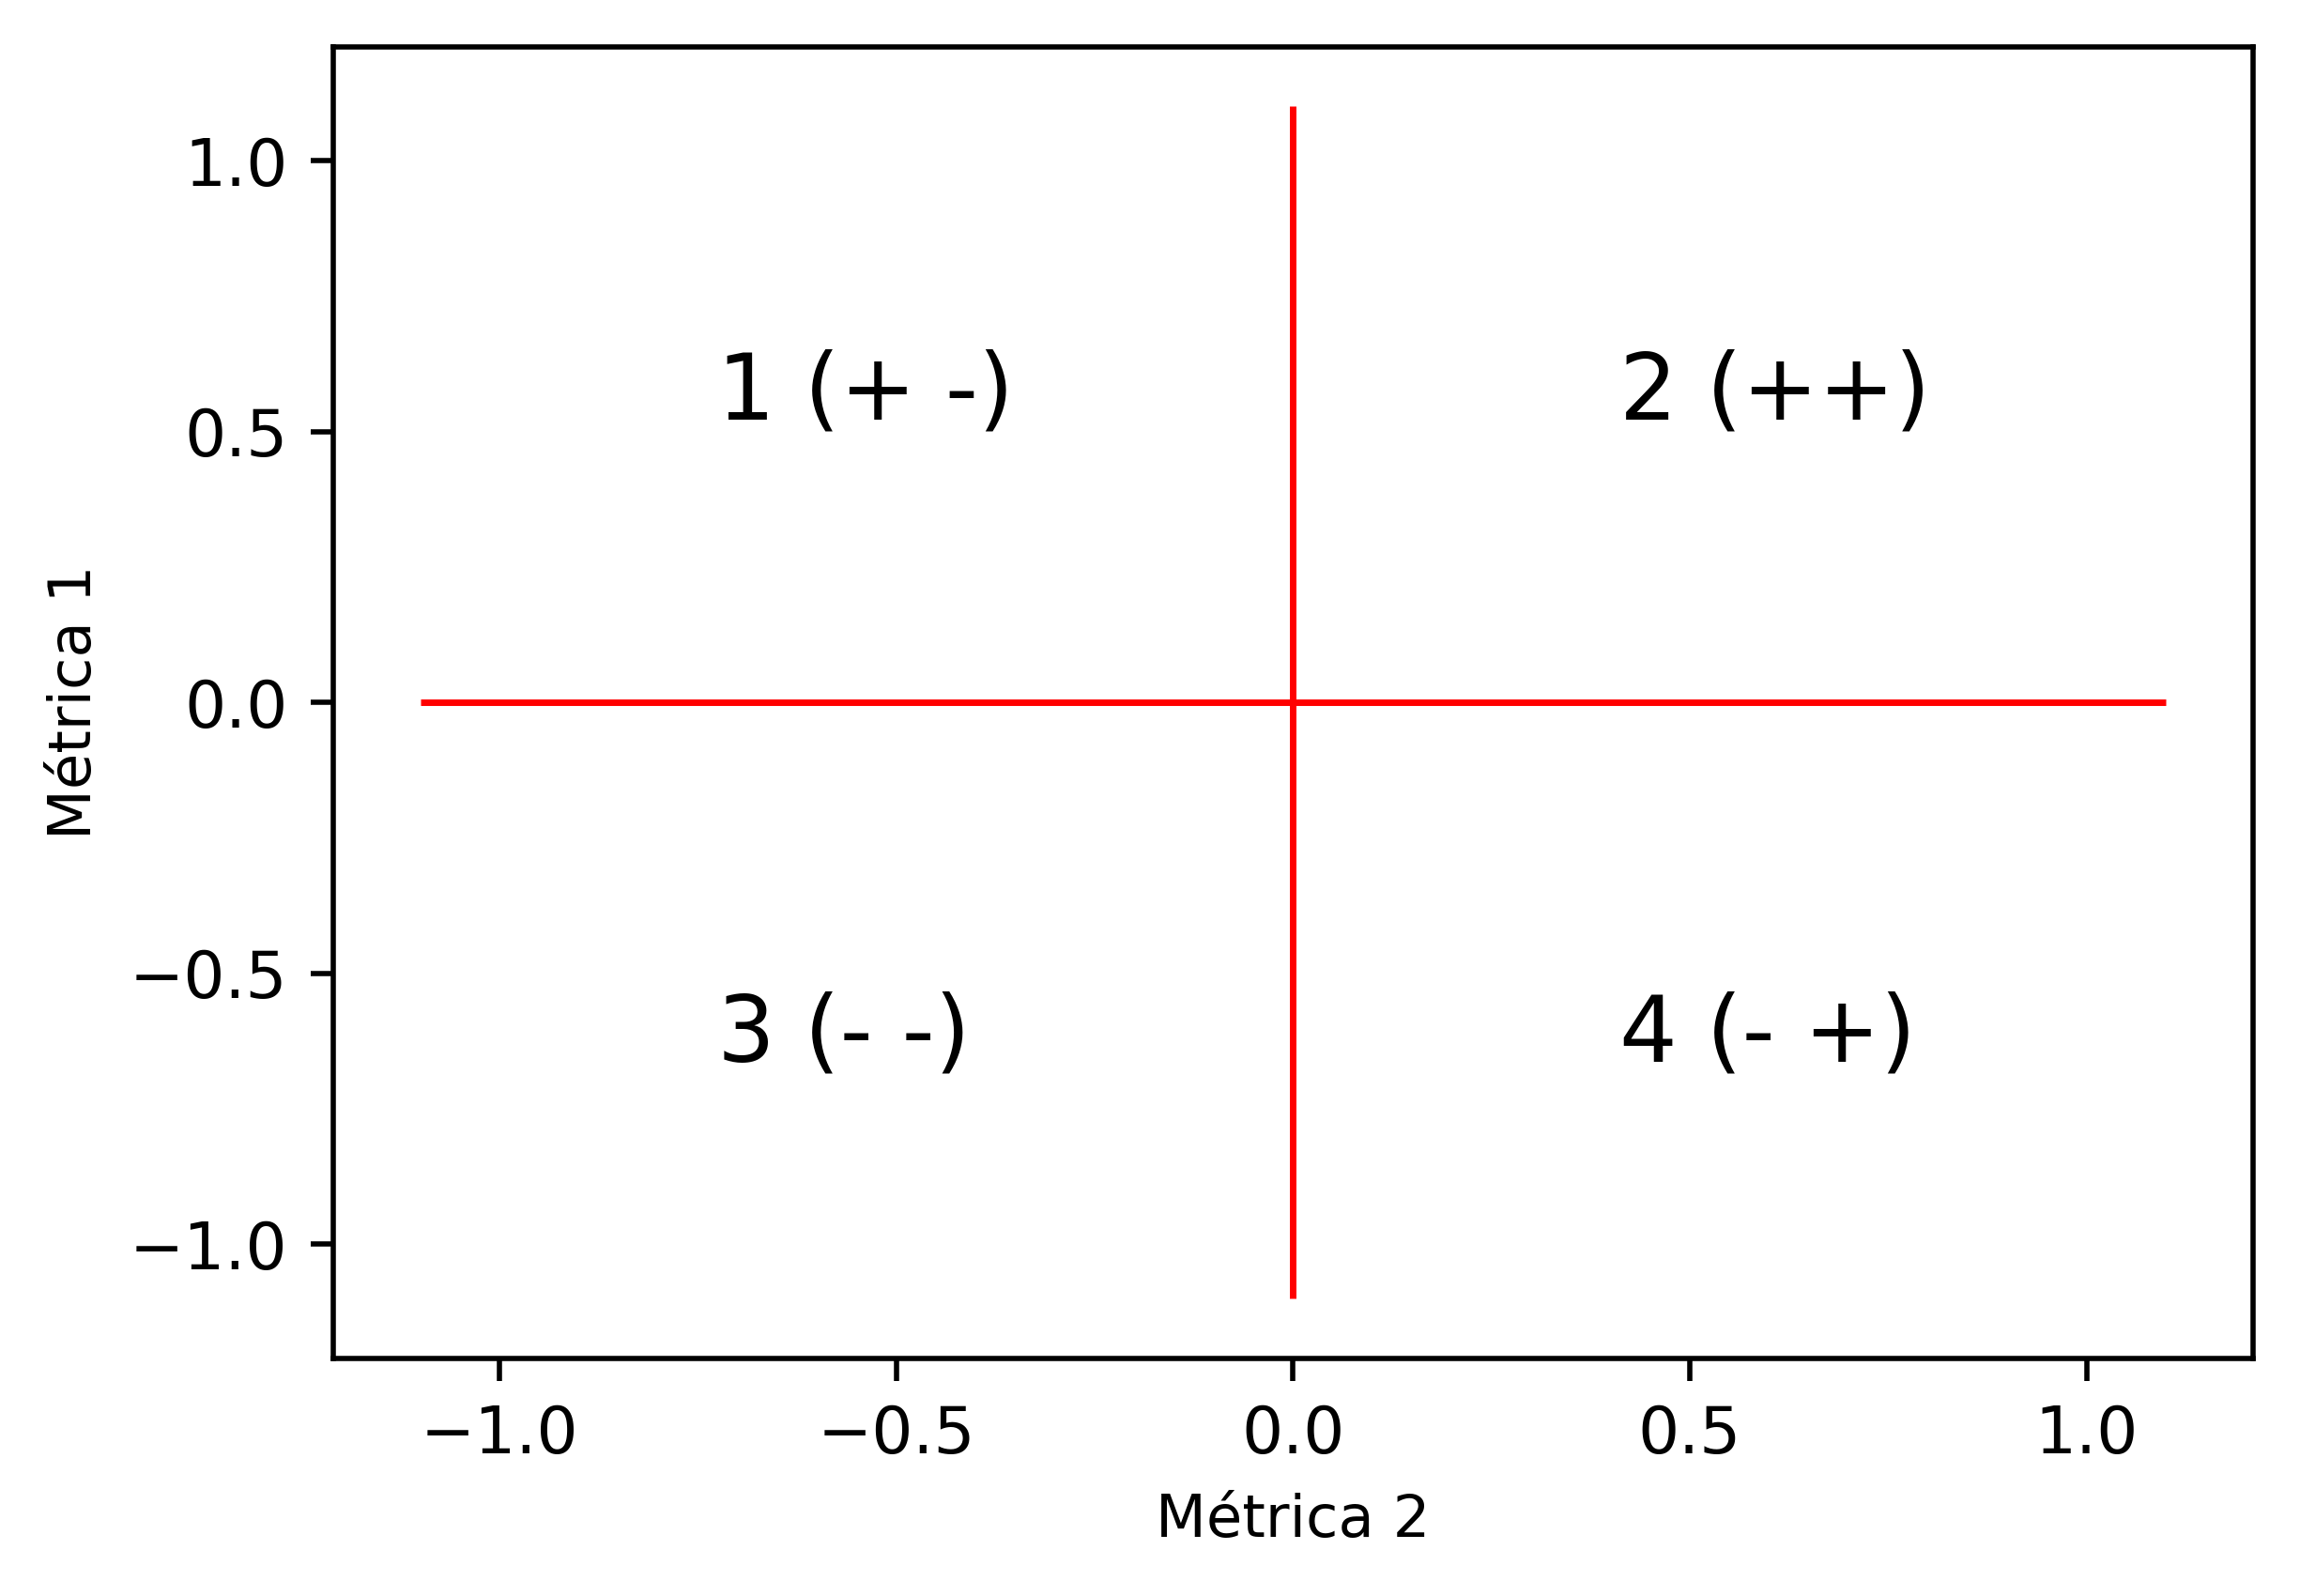

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize = (5,3.5), sharey = True, dpi = 500)

ax.plot()
ax.hlines(y=0, xmin=-1.1, xmax=1.1, linewidth=1, color='r')
ax.vlines(x=0, ymin=-1.1, ymax=1.1, linewidth=1, color='r')
ax.set_xlabel("Métrica 2", fontdict = {'fontsize': 9})
ax.set_ylabel("Métrica 1", fontdict = {'fontsize': 9})
# place a text box in upper left in axes coords
ax.text(0.2, 0.77, "1 (+ -)", transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
ax.text(0.67, 0.77, "2 (++)", transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
ax.text(0.2, 0.28, "3 (- -)", transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
ax.text(0.67, 0.28, "4 (- +)", transform=ax.transAxes, fontsize=14,
        verticalalignment='top')

fig.tight_layout()
fig.savefig("quadrantes_exemplo_500dpi.png")

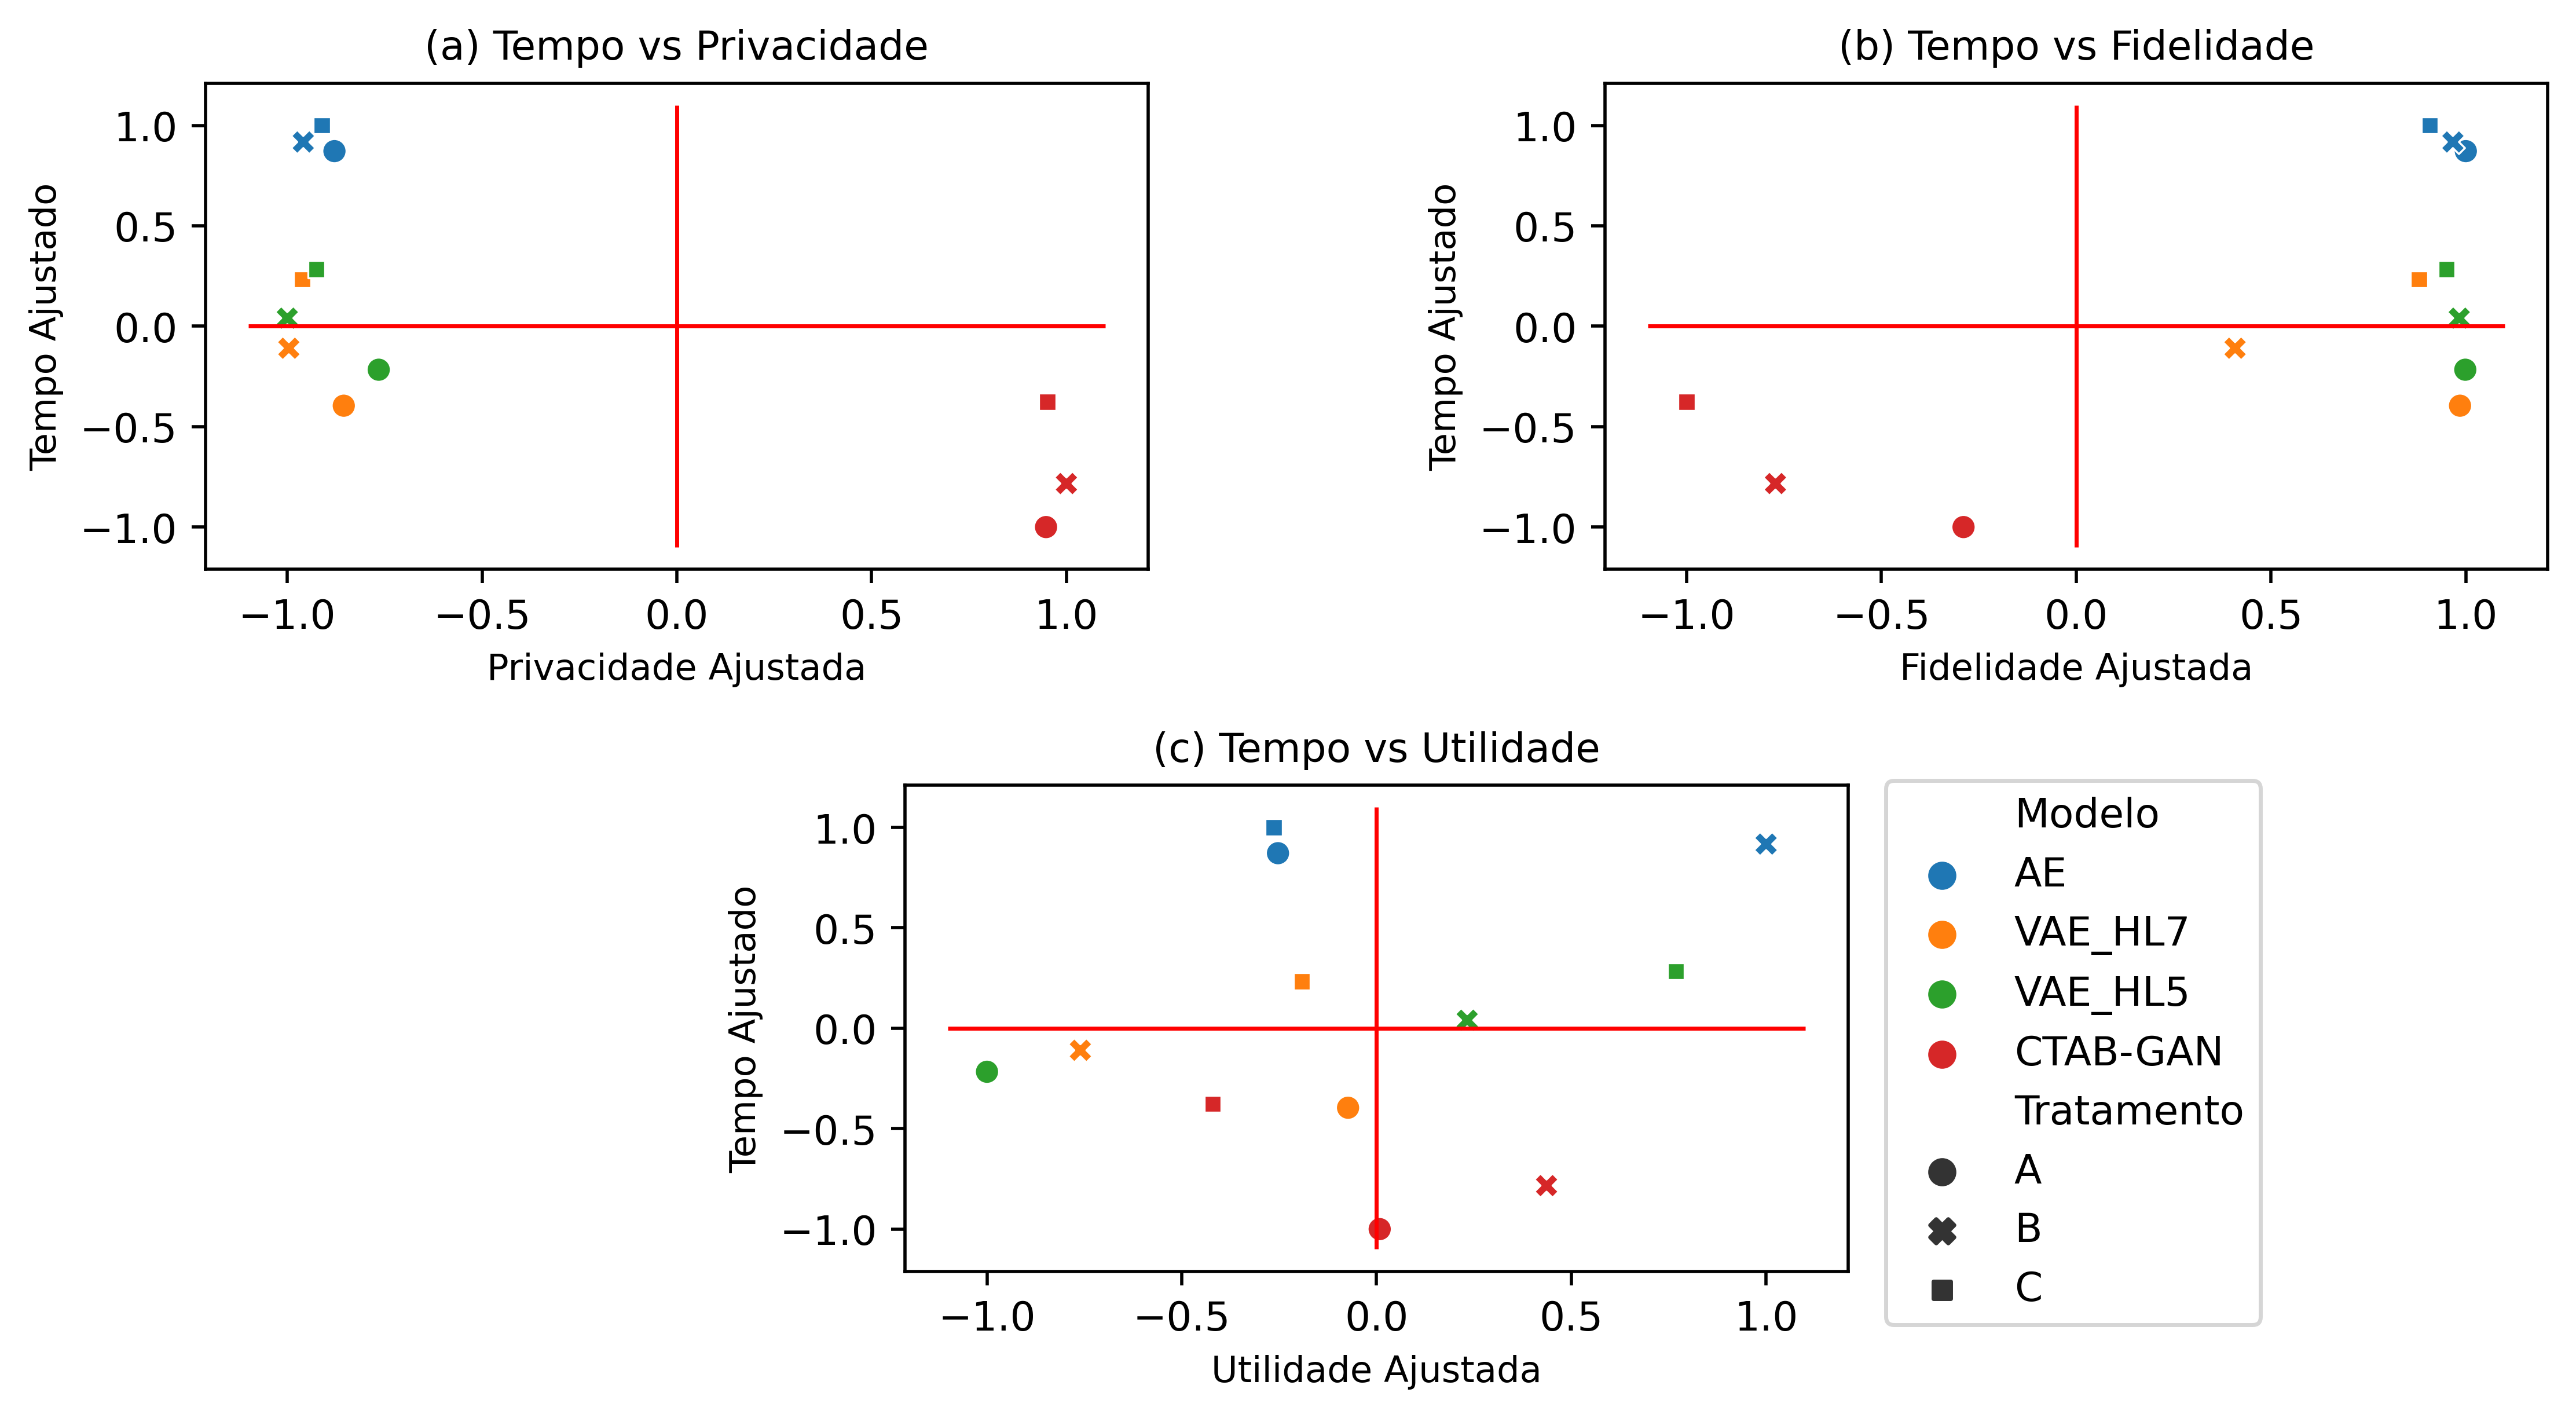

In [111]:
from matplotlib.pylab import *
from mpl_toolkits.axes_grid1 import host_subplot
import seaborn as sns



f0 = figure(num = 0, figsize = (9, 5), dpi = 500)
#f0.suptitle("Oscillation decay", fontsize=14)
ax01 = subplot2grid((4, 4), (0, 0), colspan=2, rowspan=2)
ax02 = subplot2grid((4, 4), (0, 2), colspan=2, rowspan=2)
ax03 = subplot2grid((4, 4), (2, 1), colspan=2, rowspan=2)



sns.scatterplot(x = "privacidade_adj", y = 'tempo_adj', hue = 'Modelo', style = "Tratamento",  ax = ax01, data = df_final, legend = False)
ax01.hlines(y=0, xmin=-1.1, xmax=1.1, linewidth=1, color='r')
ax01.vlines(x=0, ymin=-1.1, ymax=1.1, linewidth=1, color='r')
ax01.set_title("(a) Tempo vs Privacidade", fontdict = {'fontsize': 10})
ax01.set_xlabel("Privacidade Ajustada", fontdict = {'fontsize': 9})
ax01.set_ylabel("Tempo Ajustado", fontdict = {'fontsize': 9})

# num_desc.loc['std',:].sort_values(ascending = False)[:plot_number].plot(kind = 'bar', ax = ax01)
# ax01.set_ylabel("Variância Normalizada", fontdict = {'size':15})
# ax01.set_xlabel("Variáveis", fontdict = {'size':15})
# ax01.set_title('Variáveis com maior variância normalizada', fontdict = {'size':15})
# ax01.tick_params(axis='x', labelsize=12, labelrotation = 45)

sns.scatterplot(x = "fidelidade_adj", y = 'tempo_adj', hue = 'Modelo', style = "Tratamento",  ax = ax02, data = df_final, legend = False)
ax02.hlines(y=0, xmin=-1.1, xmax=1.1, linewidth=1, color='r')
ax02.vlines(x=0, ymin=-1.1, ymax=1.1, linewidth=1, color='r')
ax02.set_title("(b) Tempo vs Fidelidade", fontdict = {'fontsize': 10})
ax02.set_xlabel("Fidelidade Ajustada", fontdict = {'fontsize': 9})
ax02.set_ylabel("Tempo Ajustado", fontdict = {'fontsize': 9})

# num_desc.loc['std',:].sort_values(ascending = True)[:plot_number].plot(kind = 'bar', ax = ax02)
# ax02.set_ylabel("Variância Normalizada", fontdict = {'size':15})
# ax02.set_xlabel("Variáveis", fontdict = {'size':15})
# ax02.set_title('Variáveis com menor variância normalizada', fontdict = {'size':15})
# ax02.tick_params(axis='x', labelsize=12, labelrotation = 45)

sns.scatterplot(x = "utilidade_adj", y = 'tempo_adj', hue = 'Modelo', style = "Tratamento",  ax = ax03, data = df_final, legend = True)
ax03.legend(loc = [1.04,-0.11])
ax03.hlines(y=0, xmin=-1.1, xmax=1.1, linewidth=1, color='r')
ax03.vlines(x=0, ymin=-1.1, ymax=1.1, linewidth=1, color='r')
ax03.set_title("(c) Tempo vs Utilidade", fontdict = {'fontsize': 10})
ax03.set_xlabel("Utilidade Ajustada", fontdict = {'fontsize': 9})
ax03.set_ylabel("Tempo Ajustado", fontdict = {'fontsize': 9})
f0.tight_layout()
#f0.tight_layout(pad = -1
#                , h_pad = 1
#                , w_pad = -5
#                , rect = (0.9,0,1.7,1.0))
f0.savefig("tempo_vs_all2.png")

# obj_desc.loc['unique',:].sort_values(ascending = False)[:20].plot(kind = 'bar', ax = ax03, label = 'Quantidades')
# ax03.set_ylabel("# Categorias", fontdict = {'size':15})
# ax03.set_xlabel("Variáveis", fontdict = {'size':15})
# ax03.set_title('Variáveis com mais categorias', fontdict = {'size':15})
# ax03.tick_params(axis='x', labelsize=12, labelrotation = 45)
# f0.tight_layout()

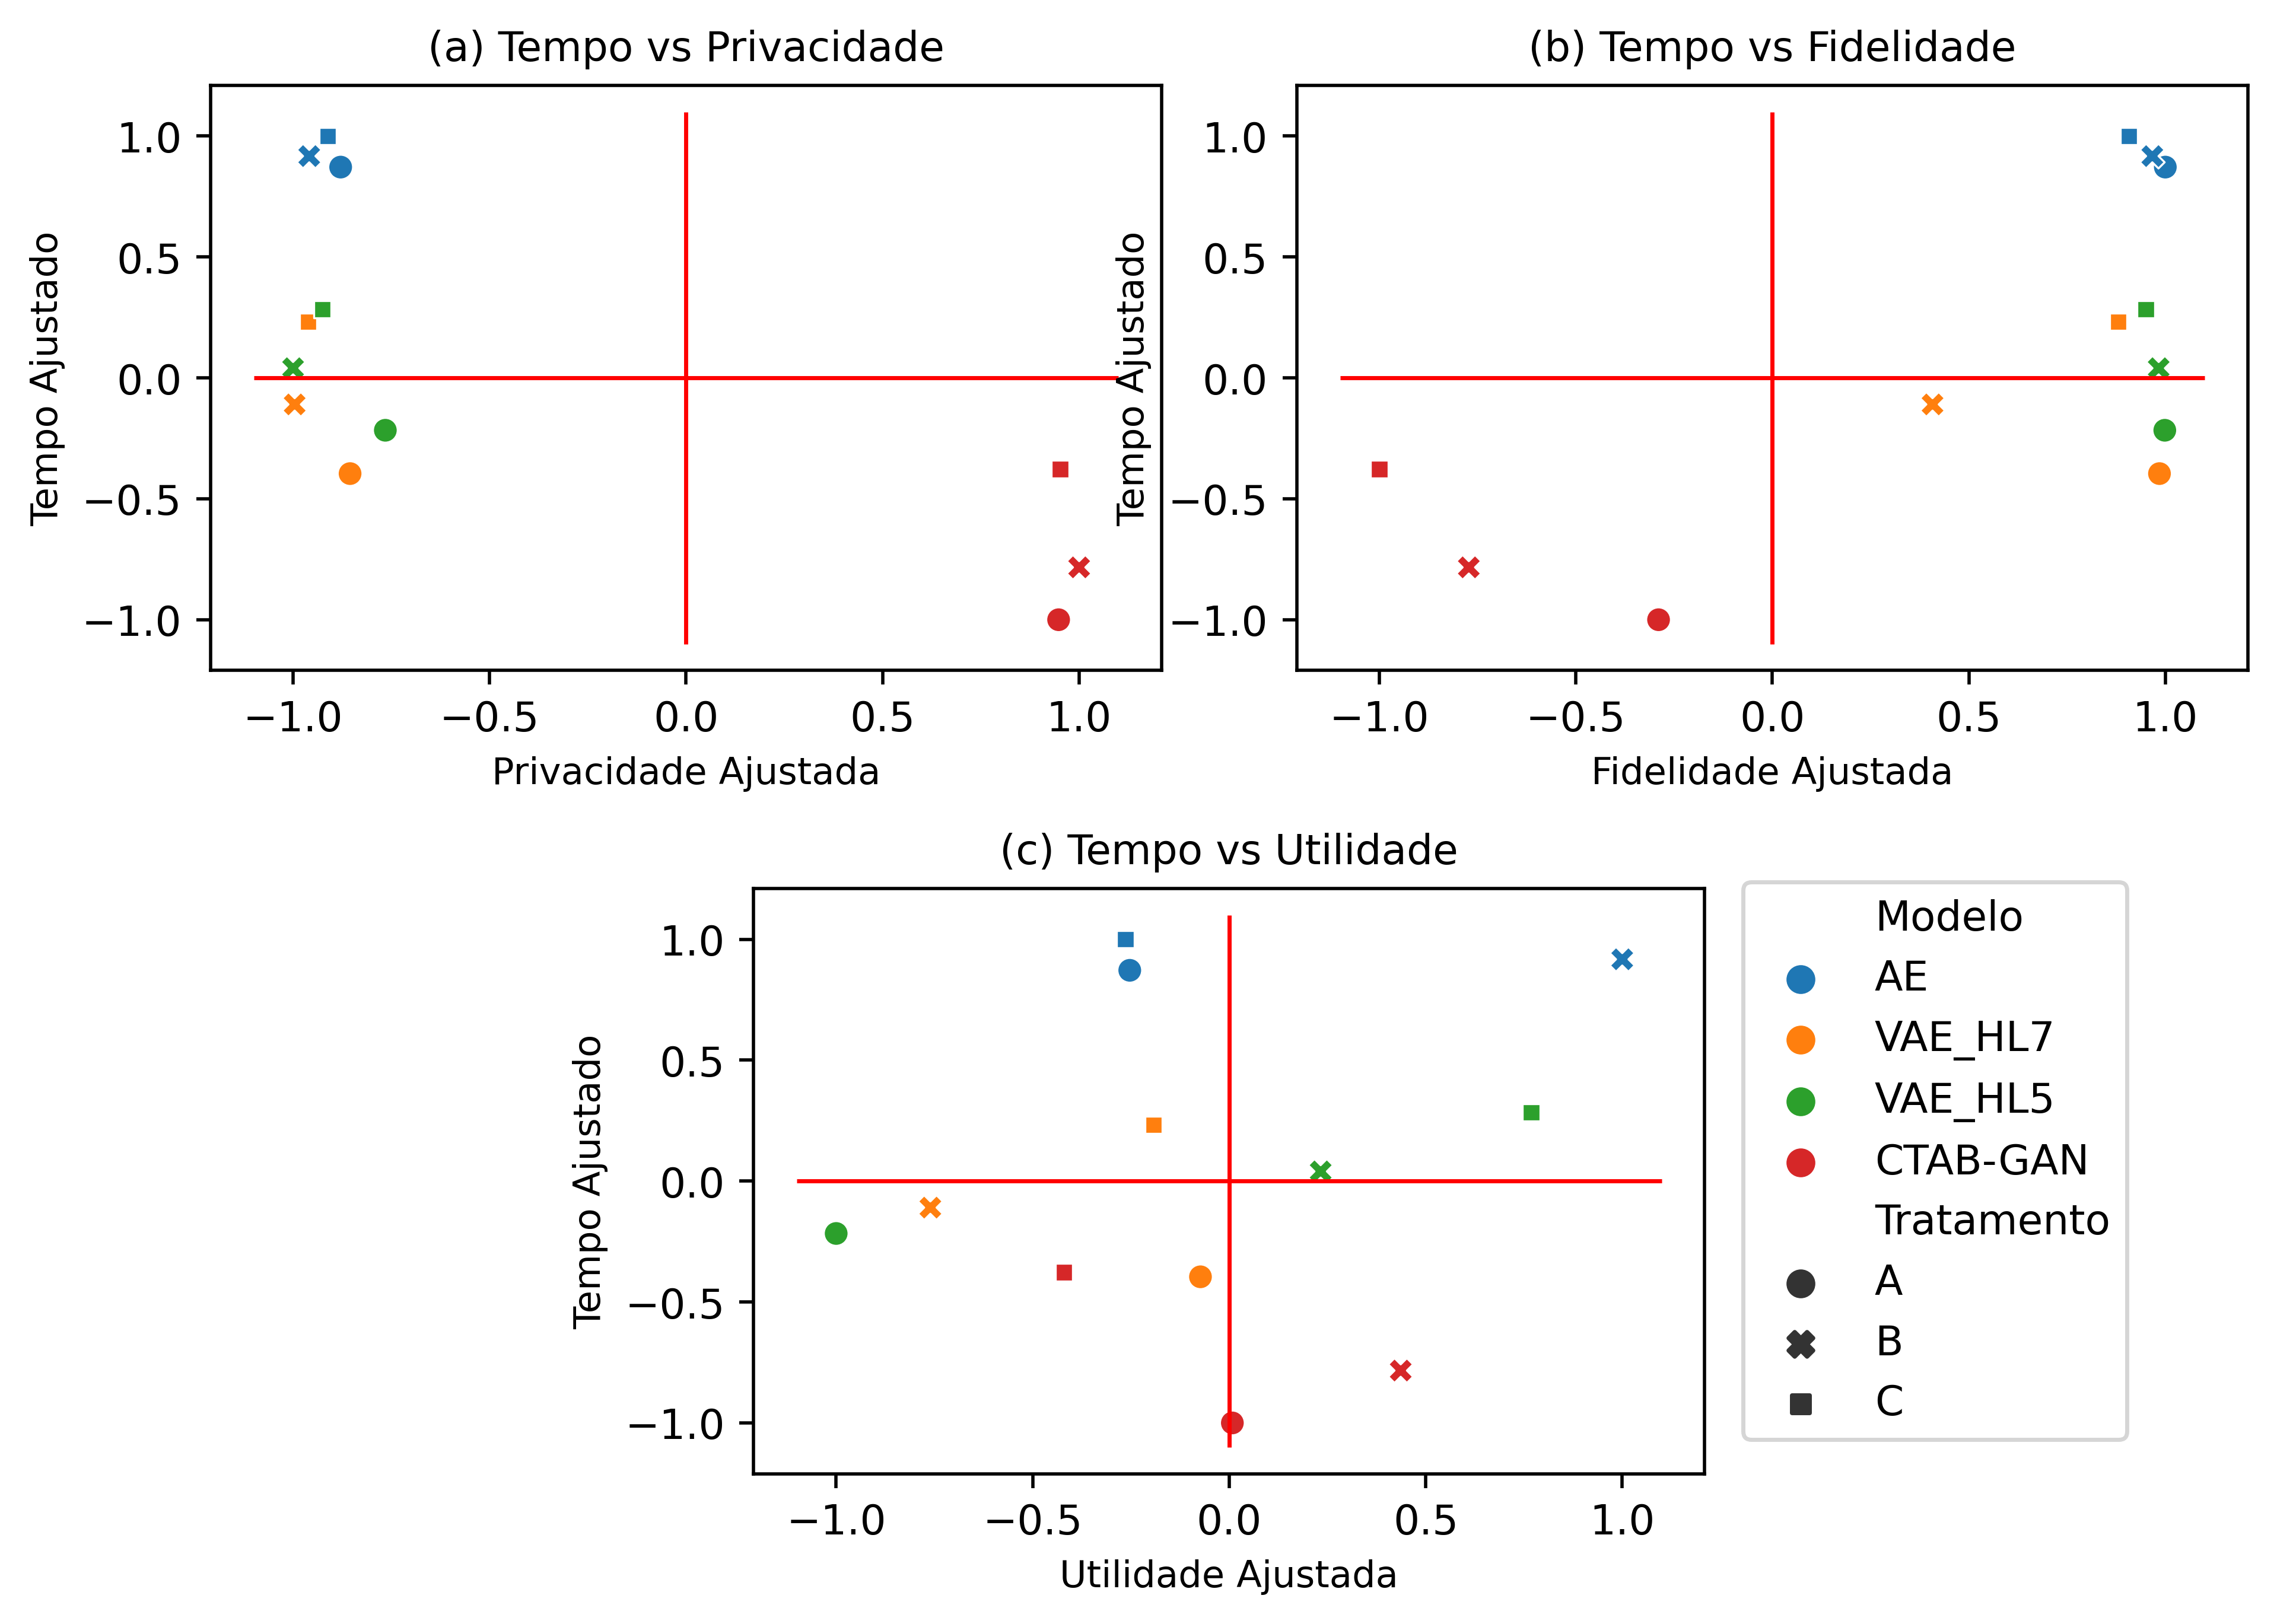

In [89]:
f0

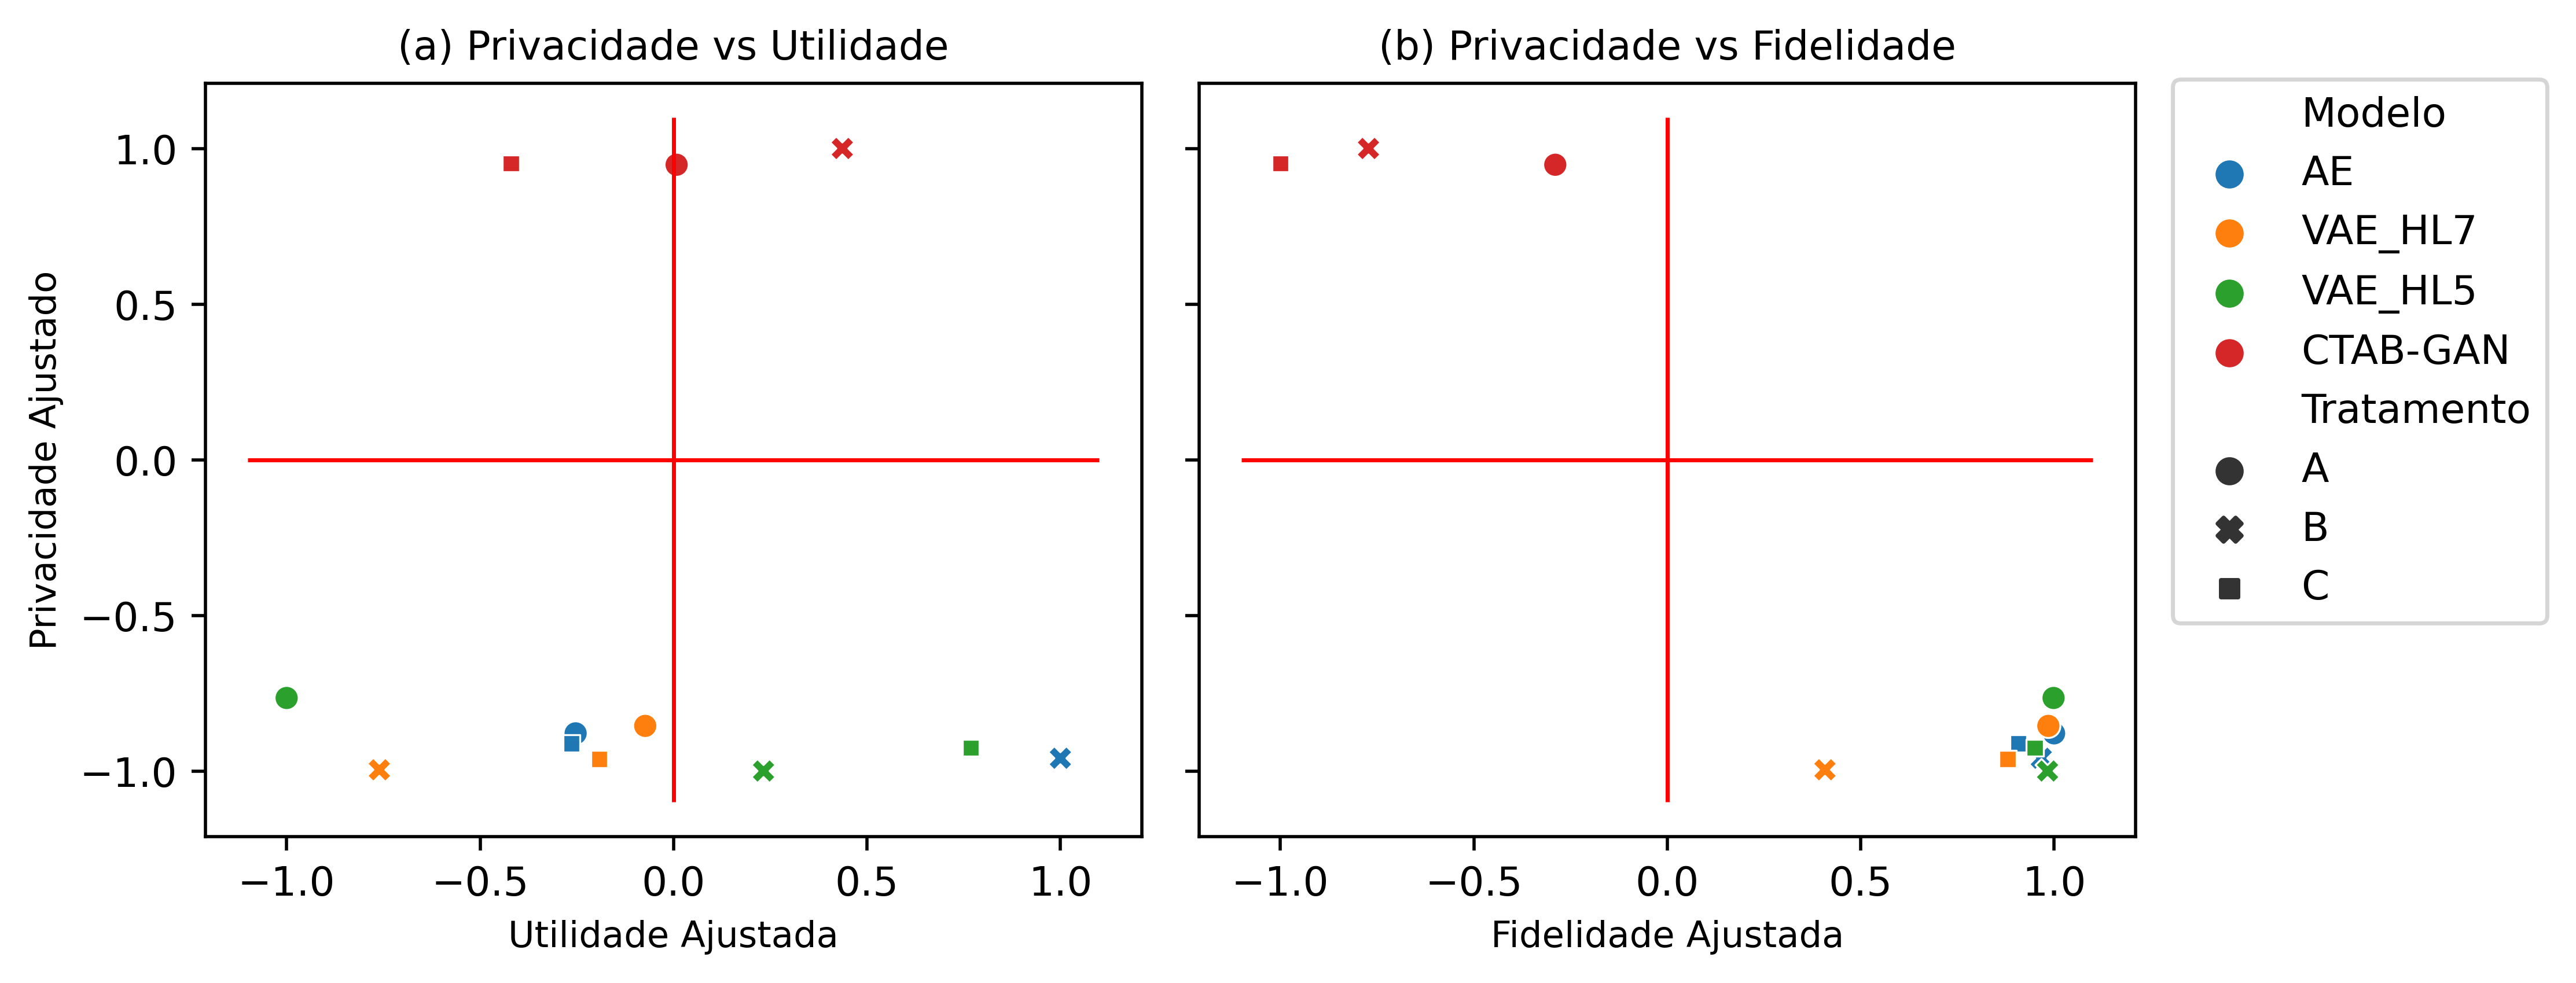

In [86]:
fig, ax = plt.subplots(1,2, figsize = (9,3.5), sharey = True, dpi = 500)

sns.scatterplot(x = "utilidade_adj", y = 'privacidade_adj', hue = 'Modelo', style = "Tratamento",  ax = ax[0], data = df_final, legend = False)
ax[0].hlines(y=0, xmin=-1.1, xmax=1.1, linewidth=1, color='r')
ax[0].vlines(x=0, ymin=-1.1, ymax=1.1, linewidth=1, color='r')
ax[0].set_title("(a) Privacidade vs Utilidade", fontdict = {'fontsize': 10})
ax[0].set_xlabel("Utilidade Ajustada", fontdict = {'fontsize': 9})
ax[0].set_ylabel("Privacidade Ajustado", fontdict = {'fontsize': 9})

sns.scatterplot(x = "fidelidade_adj", y = 'privacidade_adj', hue = 'Modelo', style = "Tratamento",  ax = ax[1], data = df_final, legend = True)
ax[1].legend(loc = [1.04,0.283])
ax[1].hlines(y=0, xmin=-1.1, xmax=1.1, linewidth=1, color='r')
ax[1].vlines(x=0, ymin=-1.1, ymax=1.1, linewidth=1, color='r')
ax[1].set_title("(b) Privacidade vs Fidelidade", fontdict = {'fontsize': 10})
ax[1].set_xlabel("Fidelidade Ajustada", fontdict = {'fontsize': 9})
ax[1].set_ylabel("Privacidade Ajustado", fontdict = {'fontsize': 9})
fig.tight_layout()

fig.savefig("privacidade_vs_all_500dpi.png")

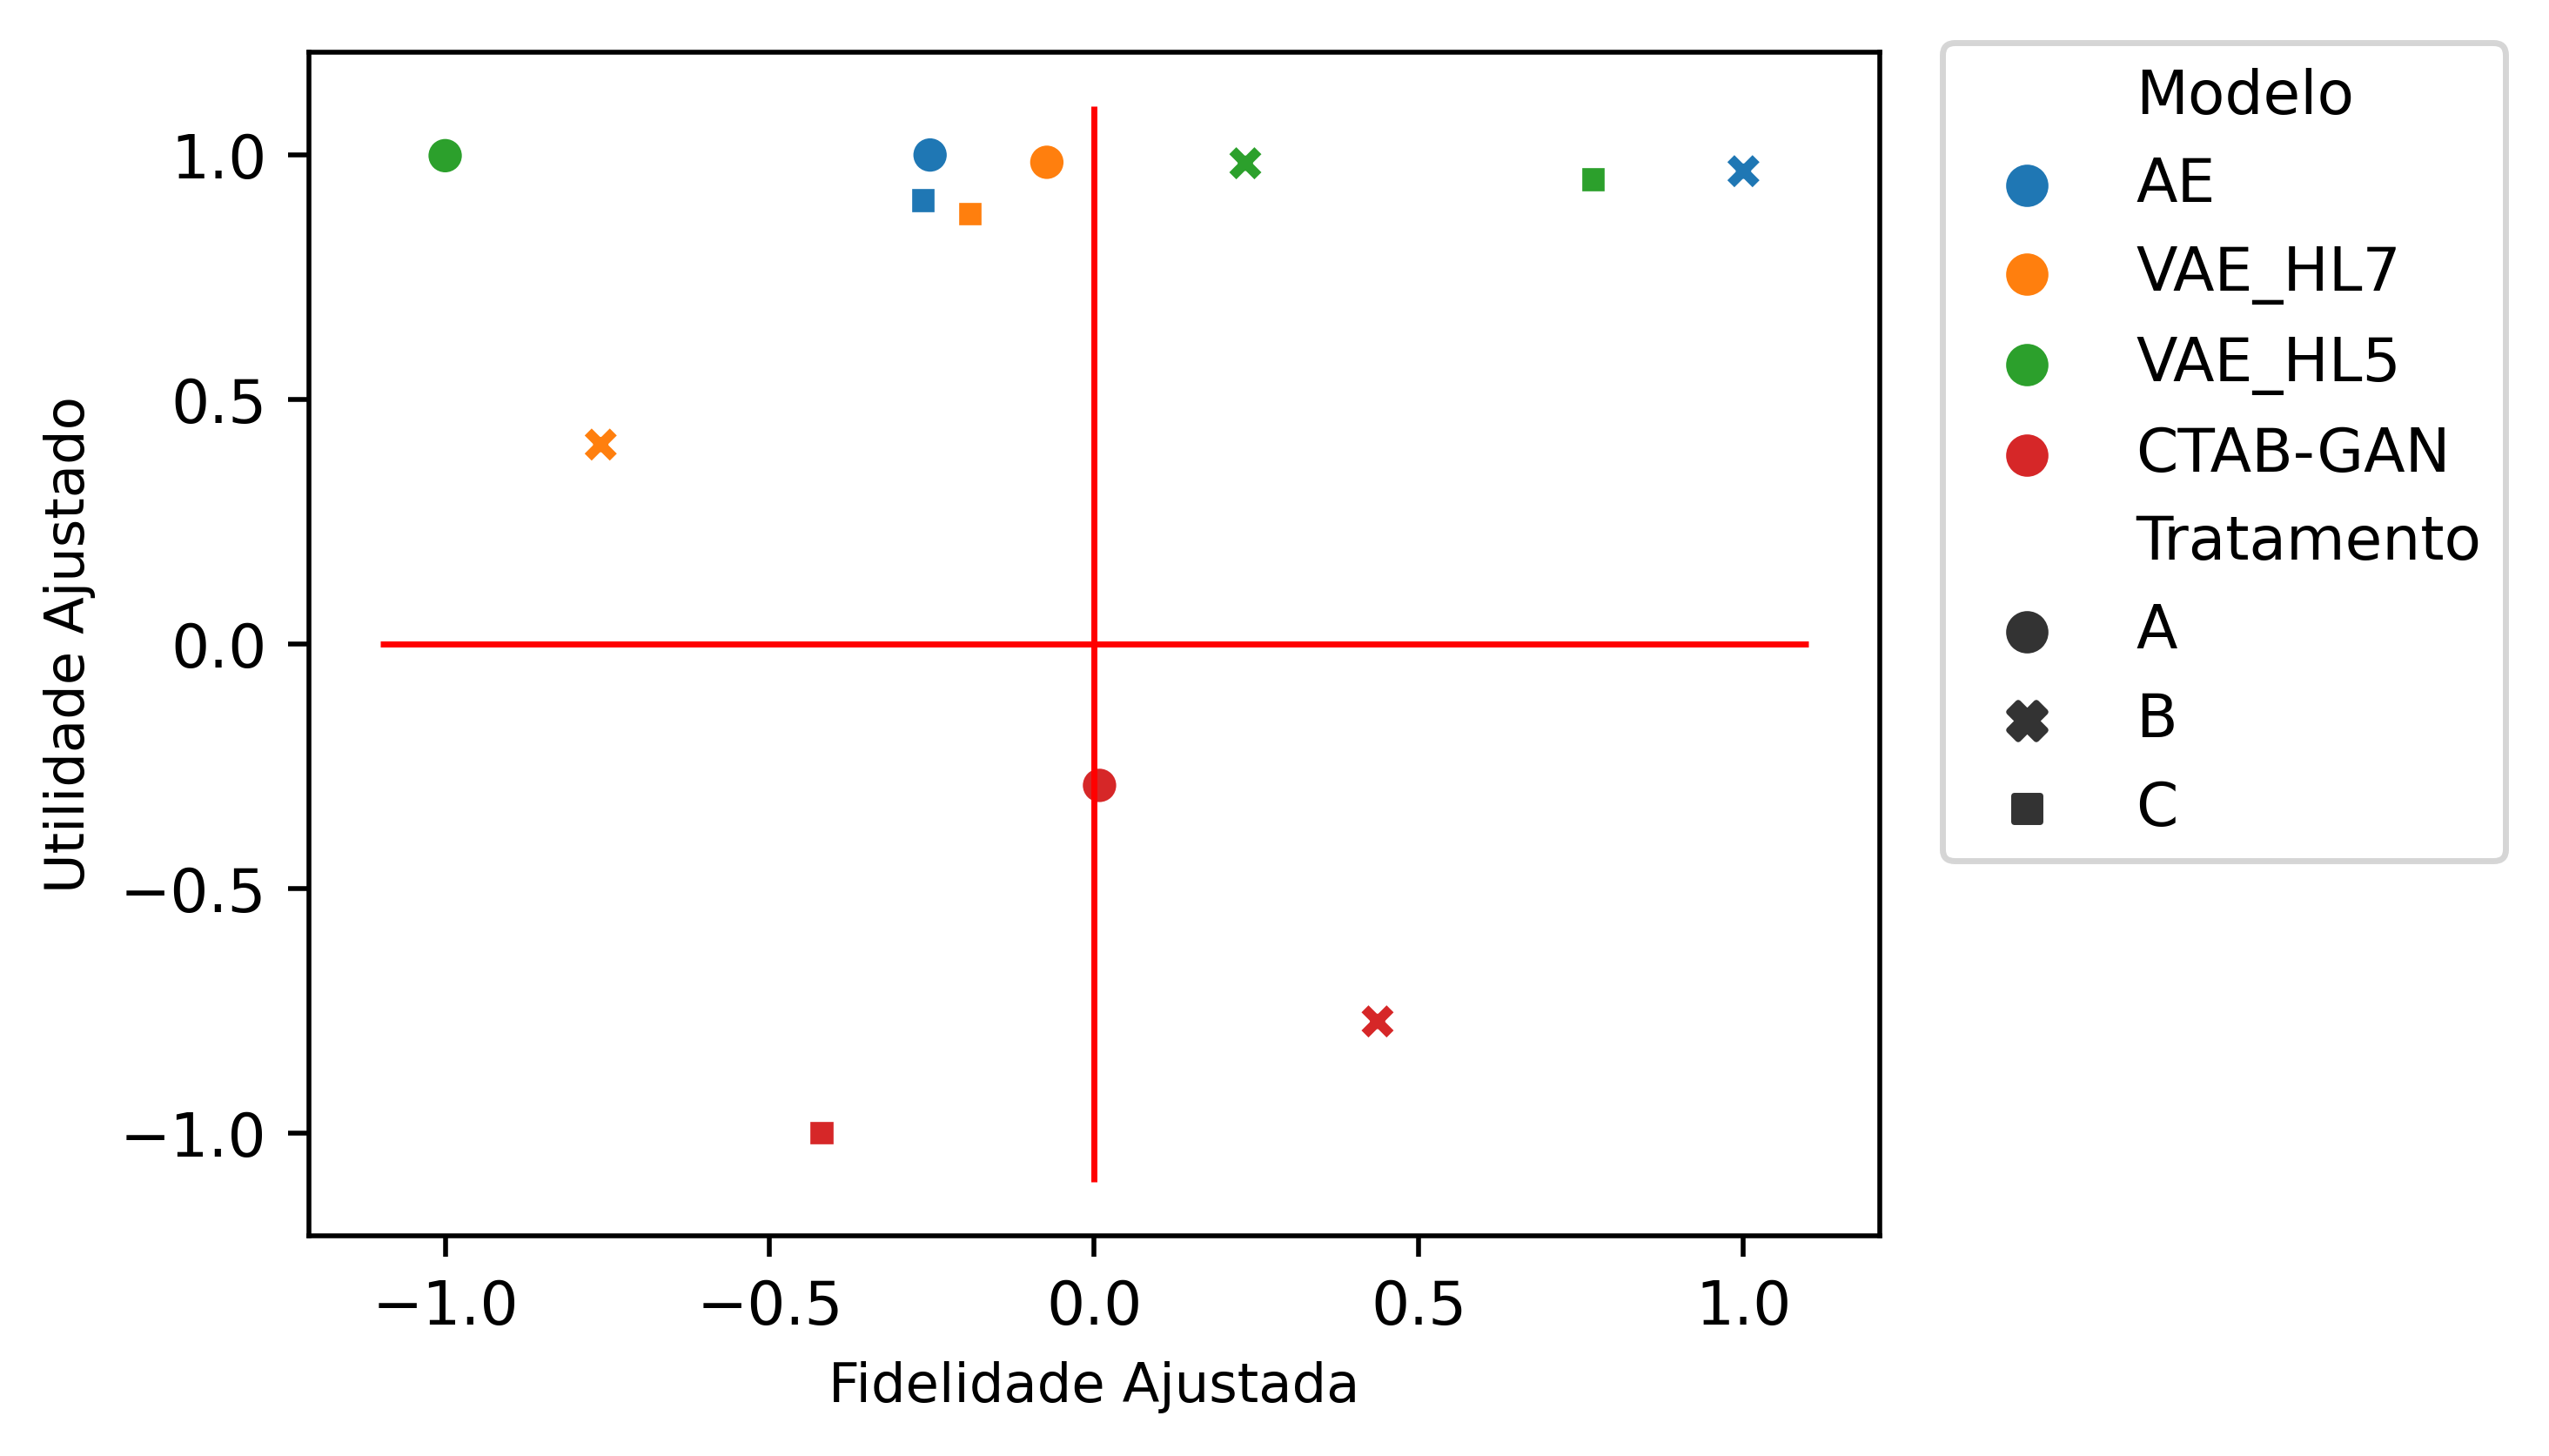

In [87]:
fig, ax = plt.subplots(1,1, figsize = (6,3.5), sharey = True, dpi = 500)

sns.scatterplot(x = "utilidade_adj", y = 'fidelidade_adj', hue = 'Modelo', style = "Tratamento",  ax = ax, data = df_final, legend = True)
ax.legend(loc = [1.04,0.3164])
ax.hlines(y=0, xmin=-1.1, xmax=1.1, linewidth=1, color='r')
ax.vlines(x=0, ymin=-1.1, ymax=1.1, linewidth=1, color='r')
ax.set_xlabel("Fidelidade Ajustada", fontdict = {'fontsize': 9})
ax.set_ylabel("Utilidade Ajustado", fontdict = {'fontsize': 9})
fig.tight_layout()

fig.savefig("utilidade_vs_all_500dpi.png")